In [1]:
import pickle
import pickletools
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
from matplotlib.ticker import AutoMinorLocator
import math
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import os


# LZStyle file:
if None != os.getenv('NERSC_HOST'):
    import matplotlib.font_manager as font_manager
    font_manager.fontManager.addfont('/global/cfs/cdirs/lz/physics/WS/SR1/msttcorefonts/Times_New_Roman.ttf')
plt.style.use('/global/cfs/cdirs/lz/users/dkodroff/LZStyle/SetLZStyle.mplstyle')
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'

# Functions

### Functions to handle lists, arrays

In [2]:
def print_rows_of_2d_array(array):
    for i in range(len(array)):
        print(f"array[{i}] = {array[i]}")
        print()

In [3]:
# define function to print dictionary keys

def print_keys(var_dict):
    
    # get name of var_dict
    var_dict_name = get_var_name(var_dict)
    print(f"variables in dictionary: {var_dict_name}")
    print()
    for key in var_dict.keys():
        print(key)

In [4]:
# define function that retrieves variable names from list of variables

def get_var_name(var):
    for name, value in globals().items():
        if value is var:
            return name 

### Wall Potting Functions (appear later on)

# Plot Wall Shape Over Time

## Load Data

In [5]:
# Get the default protocol version used in the pickle file
protocol_version = pickle.DEFAULT_PROTOCOL
# Print the protocol version
print(f"Pickle Protocol Version: {protocol_version}")

# Function to load data from a pickle file and display it
def load_and_display_data(file_name):
    with open(file_name, 'rb') as file:
        loaded_data = pickle.load(file)
        # print(f"Loaded Data from {file_name}:")
        # print(loaded_data)
        # print()
    return loaded_data

# # to make them go into their own folder 
# with open('pickle-files/pnk_avg_wave_corr.pickle', 'rb') as f:
#     wave_form_dict = pickle.load(f)

"""
CONSTANT FIT FOR HEIGHT, INTERPOLATION FOR R^2
"""
# # File names of the pickle files
# file_names = ['Version-2_SR3_WSv4_Xe131m_r2-hh_for-all-time-ints.pickle', \
#               'Version-2_SR3_WSv4_Xe131m_d-r2-hh_for-all-time-ints.pickle', \
#               'Version-2_SR3_WSv4_Xe131m_n-slice_for-all-time-ints.pickle', \
#               'Version-2_SR3_WSv4_Xe131m_num-bins_for-all-time-ints.pickle', \
#               'Version-2_SR3_WSv4_Xe131m_dT-slice-dict_for-all-time-ints.pickle', \
#               'Version-2_SR3_WSv4_Xe131m_t-title-string-all_for-all-time-ints.pickle', \
#               'Version-2_SR3_WSv4_Xe131m_t-span-all_for-all-time-ints.pickle', \
#               'Version-2_SR3_WSv4_Xe131m_dT-vs-r2-events-dict.pickle', \
#               'Version-2_SR3_WSv4_Xe131m_dT-vs-r2-events-2sig-cut-dict.pickle']

"""
LINEAR FIT FOR HEIGHT, LINEAR FIT FOR R^2
"""
# File names of the pickle files
file_names = ['Version-2_SR3_WSv4_Xe131m_LINEAR_r2-hh_for-all-time-ints.pickle', \
              'Version-2_SR3_WSv4_Xe131m_LINEAR_d-r2-hh_for-all-time-ints.pickle', \
              'Version-2_SR3_WSv4_Xe131m_LINEAR_n-slice_for-all-time-ints.pickle', \
              'Version-2_SR3_WSv4_Xe131m_LINEAR_num-bins_for-all-time-ints.pickle', \
              'Version-2_SR3_WSv4_Xe131m_dT-slice-dict_for-all-time-ints.pickle', \
              'Version-2_SR3_WSv4_Xe131m_LINEAR_t-title-string-all_for-all-time-ints.pickle', \
              'Version-2_SR3_WSv4_Xe131m_LINEAR_t-span-all_for-all-time-ints.pickle', \
              'Version-2_SR3_WSv4_Xe131m_dT-vs-r2-events-2sig-cut-dict.pickle', \
              'Version-2_SR3_WSv4_Xe131m_dT_vs_r2_cal_ints_spectra_dict.pickle']

# Load data from each pickle file and store in a list
loaded_data_list = [load_and_display_data(file_name) for file_name in file_names]

Pickle Protocol Version: 4


In [6]:
# each variable contains 25 arrays of calendar time slices
# within each calendar time slice, there are 32 dT slices

r2_hh       = loaded_data_list[0]
d_r2_hh     = loaded_data_list[1] # shape (25, 31, 2) 
# Transpose to get shape (25, 2, 31) for plotting 
# i.e. (no. of cal_T ints, len(d_r2_points) for each cal_T int and dT slice, len(r2_points) for each cal_T int)
d_r2_hh     = np.transpose(d_r2_hh, (0,2,1))
n_slice     = loaded_data_list[2]
n_slice_tot = np.sum(n_slice, 1) # sum of all the counts in a particular dT slice
num_bins    = loaded_data_list[3]
dT_i        = loaded_data_list[4]['dT_i']
dT_f        = loaded_data_list[4]['dT_f']
dT_mid      = loaded_data_list[4]['dT_mid']
t_cal_str   = loaded_data_list[5]
t_cal_span  = loaded_data_list[6]

# r2, r, and dT for each event [2 sigma cut for all calendar times together]
r2_events_2sig = loaded_data_list[7]['r2_events']
r_events_2sig  = np.sqrt(r2_events_2sig)
dT_events_2sig = loaded_data_list[7]['dT_events']

# r2, r, and dT for individual calendar time slices [2 sigma cut for each calendar time interval]
r2_sel_spectra = loaded_data_list[8]['r2_sel_spectra']
r_sel_spectra  = loaded_data_list[8]['r_sel_spectra']
dT_sel_spectra = loaded_data_list[8]['dT_sel_spectra']


In [7]:
print(num_bins[22])
print()
print(num_bins[12])

[75. 67. 66. 64. 64. 64. 64. 63. 64. 63. 63. 64. 62. 63. 62. 60. 61. 61.
 59. 61. 62. 62. 63. 62. 61. 63. 63. 64. 63. 65. 53.]

[312. 310. 313. 311. 312. 311. 311. 310. 313. 312. 311. 311. 311. 306.
 303. 295. 286. 275. 274. 278. 281. 292. 300. 303. 298. 302. 311. 316.
 316. 316. 240.]


In [8]:
print(d_r2_hh.shape)
print()
print(r2_hh.shape)
print()
print(n_slice_tot.shape)
# print()
# print(n_slice_tot)

(25, 2, 31)

(25, 31)

(25,)


In [9]:
# Convert timedelta objects to a number of days
t_cal_span_days = [td.days + td.seconds / (60 * 60 * 24) + td.microseconds / (1000000 * 60 * 60 * 24) for td in t_cal_span]

# Accumulate the time spans to get the number of days since the start date
days_since_start = np.cumsum(t_cal_span_days)

# get a rounded version 
days_since_start_round = np.round(days_since_start, 0) 

# get an integer version 
days_since_start_int   = days_since_start_round.astype(int)

# print()
# print(t_cal_span_days)
# print()
# print(days_since_start)
# print()
# print(days_since_start_round)
# print()
# print(days_since_start_int)
# print()

print(f"number of intervals: {len(t_cal_span_days)}")

number of intervals: 25


## Clean Data

In [10]:
# get dimensions of each array 
arr_list     = r2_hh, d_r2_hh, n_slice, n_slice_tot, num_bins, dT_i, dT_f, dT_mid, t_cal_str, t_cal_span
arr_list_str = 'r2_hh', 'd_r2_hh', 'n_slice', 'n_slice_tot', 'num_bins', 'dT_i', 'dT_f', 'dT_mid', 't_cal_str', 't_cal_span'

# Loop through the list of arrays and print their shapes
for arr, arr_str in zip(arr_list, arr_list_str):
    print(f"Dimensions of {arr_str} array: {arr.shape}")


Dimensions of r2_hh array: (25, 31)
Dimensions of d_r2_hh array: (25, 2, 31)
Dimensions of n_slice array: (25, 31)
Dimensions of n_slice_tot array: (25,)
Dimensions of num_bins array: (25, 31)
Dimensions of dT_i array: (31,)
Dimensions of dT_f array: (31,)
Dimensions of dT_mid array: (31,)
Dimensions of t_cal_str array: (25,)
Dimensions of t_cal_span array: (25,)


#### Check the lists of numbers of events in each drift time slice 

In [11]:
for i in range(len(t_cal_str)):
    print(f"Calendar date {i}: {t_cal_str[i]}")
    print()
    print(f"Number of events per drift in each drift time slice: ")
    print(f"{n_slice[i]}")
    print()
    print()

Calendar date 0: 27 Mar. 2023 – 9 Apr. 2023

Number of events per drift in each drift time slice: 
[1284.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.]


Calendar date 1: 9 Apr. 2023 – 22 Apr. 2023

Number of events per drift in each drift time slice: 
[16242. 15921. 16050. 15847. 15941. 16043. 16136. 16111. 16292. 16066.
 16161. 16309. 16312. 16064. 16117. 16277. 16004. 16288. 16342. 16446.
 16472. 16256. 16602. 16631. 16283. 16336. 16611. 16820. 16709. 16539.
  9511.]


Calendar date 2: 22 Apr. 2023 – 5 May. 2023

Number of events per drift in each drift time slice: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


Calendar date 3: 5 May. 2023 – 19 May. 2023

Number of events per drift in each drift time slice: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

#### Check which lists are too empty

In [12]:
# check which lists contain only 0 elements

good_mask = np.zeros(len(n_slice), dtype=bool)

for i in range(len(n_slice)):
    num_zeros = np.sum(n_slice[i] == 0)
    total_elements = n_slice[i].size
    proportion_zeros = num_zeros / total_elements
    if proportion_zeros > 3/4:
        print(f"date_range[{i}]: {t_cal_str[i]} - More than 3/4 zeros")
    else:
        good_mask[i] = True
        print(f"date_range[{i}]: {t_cal_str[i]} - good")

print()
print(f"good_mask = {good_mask}")

date_range[0]: 27 Mar. 2023 – 9 Apr. 2023 - More than 3/4 zeros
date_range[1]: 9 Apr. 2023 – 22 Apr. 2023 - good
date_range[2]: 22 Apr. 2023 – 5 May. 2023 - More than 3/4 zeros
date_range[3]: 5 May. 2023 – 19 May. 2023 - More than 3/4 zeros
date_range[4]: 19 May. 2023 – 1 Jun. 2023 - More than 3/4 zeros
date_range[5]: 1 Jun. 2023 – 14 Jun. 2023 - good
date_range[6]: 14 Jun. 2023 – 27 Jun. 2023 - good
date_range[7]: 27 Jun. 2023 – 10 Jul. 2023 - good
date_range[8]: 10 Jul. 2023 – 23 Jul. 2023 - good
date_range[9]: 23 Jul. 2023 – 5 Aug. 2023 - good
date_range[10]: 5 Aug. 2023 – 18 Aug. 2023 - good
date_range[11]: 18 Aug. 2023 – 1 Sep. 2023 - good
date_range[12]: 1 Sep. 2023 – 14 Sep. 2023 - good
date_range[13]: 14 Sep. 2023 – 27 Sep. 2023 - good
date_range[14]: 27 Sep. 2023 – 10 Oct. 2023 - good
date_range[15]: 10 Oct. 2023 – 23 Oct. 2023 - good
date_range[16]: 23 Oct. 2023 – 5 Nov. 2023 - good
date_range[17]: 5 Nov. 2023 – 18 Nov. 2023 - good
date_range[18]: 18 Nov. 2023 – 1 Dec. 2023 -

#### Replace entirely empty calendar time slices with NaNs and check the lists of numbers of events

In [13]:
"""
REPLACE INTERVALS THAT FAIL THE GOOD MASK WITH NANS 
"""

# create placeholder nan entry for bad arrays 
nan = np.nan


r2_hh       = np.where(good_mask[:, np.newaxis], r2_hh, nan)
d_r2_hh     = np.where(good_mask[:, np.newaxis, np.newaxis], d_r2_hh, nan)
n_slice     = np.where(good_mask[:, np.newaxis], n_slice, nan)
n_slice_tot = np.where(good_mask, n_slice_tot, nan)
num_bins    = np.where(good_mask[:, np.newaxis], num_bins, nan)
dT_i        = dT_i
dT_f        = dT_f
dT_mid      = dT_mid
t_cal_str   = t_cal_str
t_cal_span  = t_cal_span

In [14]:
# for i in range(len(t_cal_str)):
#     print(f"Calendar date {i}: {t_cal_str[i]}")
#     print()
#     print(f"Number of events for each drift time slice of each calendar time slice: ")
#     print(f"{n_slice[i]}")
#     print()
#     print()

In [15]:
# check which lists contain only nan elements

# Initialize counters
num_all_nan = 0
num_not_all_nan = 0

# Check arrays for all NaNs
def is_it_all_nans(array):
    return np.all(np.isnan(array))

for i in range(len(t_cal_str)):
    if is_it_all_nans(r2_hh[i]):
        num_all_nan += 1
    else:
        num_not_all_nan += 1

print()
print(f"Number of arrays that are all NaNs:     {num_all_nan}")
print(f"Number of arrays that are not all NaNs: {num_not_all_nan}")
print(f"________________________________________________________________")
print()

for i in range(len(t_cal_str)):
    if is_it_all_nans(r2_hh[i]):
        print(f"date_range[{i}]: {t_cal_str[i]}    *~ ALL NaNs ~*")
        print(f"⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻")
        print(f"________________________________________________________________")
        print()
    else:
        print(f"date_range[{i}]: {t_cal_str[i]}    CONTAINS DATA")
        print(f"⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻")
        print(f"________________________________________________________________")        
        print()



Number of arrays that are all NaNs:     4
Number of arrays that are not all NaNs: 21
________________________________________________________________

date_range[0]: 27 Mar. 2023 – 9 Apr. 2023    *~ ALL NaNs ~*
⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻
________________________________________________________________

date_range[1]: 9 Apr. 2023 – 22 Apr. 2023    CONTAINS DATA
⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻
________________________________________________________________

date_range[2]: 22 Apr. 2023 – 5 May. 2023    *~ ALL NaNs ~*
⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻
________________________________________________________________

date_range[3]: 5 May. 2023 – 19 May. 2023    *~ ALL NaNs ~*
⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻
________________________________________________________________

date_range[4]: 19 May. 2023 – 1 Jun. 2023    *~ ALL NaNs ~*
⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻
________________________________________________________________

date_range[5]: 1 Jun. 2023 – 14 Jun. 2023    CONTAINS DATA
⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻
________________________________________________________________

date

In [16]:
# for i in range(len(t_cal_str)):
#     print(f"Calendar date {i}: {t_cal_str[i]}")
#     print()
#     print(f"r2 value for each drift time slice of each calendar time slice: ")
#     print(f"{r2_hh[i]}")
#     print()
#     print()

In [17]:
# get dimensions of each array "good" array
arr_list_good     = r2_hh, d_r2_hh, n_slice, n_slice_tot, num_bins, dT_i, dT_f, dT_mid, t_cal_str, t_cal_span
arr_list_str_good = 'r2_hh', 'd_r2_hh', 'n_slice', 'n_slice_tot', 'num_bins', 'dT_i', 'dT_f', 'dT_mid', 't_cal_str', 't_cal_span'


In [18]:
# Loop through the list of arrays and print their shapes
for arr, arr_str in zip(arr_list_good, arr_list_str_good):
    print(f"Dimensions of {arr_str} array: {arr.shape}")

Dimensions of r2_hh array: (25, 31)
Dimensions of d_r2_hh array: (25, 2, 31)
Dimensions of n_slice array: (25, 31)
Dimensions of n_slice_tot array: (25,)
Dimensions of num_bins array: (25, 31)
Dimensions of dT_i array: (31,)
Dimensions of dT_f array: (31,)
Dimensions of dT_mid array: (31,)
Dimensions of t_cal_str array: (25,)
Dimensions of t_cal_span array: (25,)


#### Generate a mask that finds where the $r^2$ value is zero

In [19]:
# find r2 points that are more than 2 standard deviatitions than the ones around it 

def find_bad_r2_points(r2, t_cal_str):
    
    # define empty arrays to store avg and stdev r2 values for each of the 20 calendar time slices
    r2_avg_all = np.zeros(len(r2))
    r2_std_all = np.zeros(len(r2))
    
    # make a blank mask that is true for good r2 values and false for ones that are too far off the mean 
    r2_good_mask = np.zeros((len(r2),len(r2[0])), dtype=bool)
    
    # make a blank dictionary to store bad point indices
    bad_r2_indices_dict = {}

    for i in range(len(r2)):

        # find avg for each calendar time slice
        r2_avg = np.mean(r2[i])

        # store avg and stddev 
        r2_avg_all[i] = r2_avg

        # List to store bad column indices for time interval i
        bad_indices_i = []

        for j in range(len(r2[i])):

            # make condition that r2 values that less than 0.75 * r2_avg are "bad" points
            if (r2[i][j] <= (0.8 * r2_avg)):

                # add to bad list 
                r2_good_mask[i][j] = False

                # Append bad column index to the list
                bad_indices_i.append(j)

            else:
                # add to good list
                r2_good_mask[i][j] = True

        # Store the list of bad indices for time interval i
        bad_r2_indices_dict[i] = bad_indices_i
    
    # # print statements to debug
    # print(f"r2_avg_all = {r2_avg_all}")
    # print()
    # print(f"r2_std_all = {r2_std_all}")
    # print()
    # print()
    # print(f"r2_good_mask   = {r2_good_mask}")
    # print(f"bad_r2_indices_dict = {bad_r2_indices_dict}")
    
    return r2_good_mask, bad_r2_indices_dict          
                

In [20]:
r2_good_mask, bad_r2_indices_dict = find_bad_r2_points(r2_hh, t_cal_str)

# print_keys(bad_r2_indices_dict)
print(f"r2_good_mask.shape = {r2_good_mask.shape}")
print()
print(f"bad_r2_indices_dict = {bad_r2_indices_dict}")

r2_good_mask.shape = (25, 31)

bad_r2_indices_dict = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: []}


## General Wall Plots

In [21]:

def wall_plots(plots_per_row, r2_points_all, d_r2_points_all, \
               dT_mid_points, date_range_all, good_mask, \
               x_range=None, y_range=None, flag = False, \
               source_string='Xe 131m'):
    
    # applying good_mask to all variables (no nans for calendar date needed here)
    date_range  = date_range_all[good_mask]
    r2_points   = r2_points_all[good_mask]
    d_r2_points = d_r2_points_all[good_mask]
    
    # set up subplot layout
    ppr = [plots_per_row] * math.ceil(len(r2_points) / plots_per_row) 
    ppr[-1] = len(r2_points) - sum(ppr[:-1]) 
    num_rows = len(ppr)

    # Set up the figure and subplots
    fig, axs = plt.subplots(num_rows, max(ppr), figsize=(16, num_rows * 5))

    # Flatten the axs array for easier indexing
    axs = axs.flatten()

    colorlist_backwards = plt.cm.rainbow(np.linspace(0, 1, len(r2_points)))
    colorlist = colorlist_backwards[::-1]
    
    # Overlay plot initialization
    overlay_ax = plt.figure(figsize=(18, 9)).add_subplot()
    
    for i in range(len(r2_points)):

        ax = axs[i]

        ax.errorbar(r2_points[i], dT_mid_points, xerr=d_r2_points[i], fmt='.', color='xkcd:raspberry')
        ax.set_title(f"{date_range[i]} [{i}]")
        ax.invert_yaxis()  # Flip the y-axis
        ax.set_ylabel('Drift Time [$\mu$s]')
        ax.set_xlabel('$r^2$ [${cm}^2$]')

        if x_range:
            ax.set_xlim(x_range)

        if y_range:
            ax.set_ylim(y_range)

        # Adjust spacing between subplots
        fig.tight_layout(pad=2.0)

        # Overlay plot
        overlay_ax.plot(r2_points[i], dT_mid_points, label=date_range[i], linewidth = 1, color = colorlist[i])
        
        if flag == True:
            print(f"i={i}")
            print()
            print(f"r2_points[i].shape   = {r2_points[i].shape}")
            print(f"d_r2_points[i].shape = {d_r2_points[i].shape}")
            print(f"___________________________________________")
            print()
        
    # Add main title above the subplots
    main_title = f"{source_string} (SR3 WSv4 LZAP-5.7.0)"
    fig.suptitle(main_title, y=1.01, fontsize=12)

    # Set labels for overlay plot
    overlay_ax.set_xlabel('r2_hh')
    overlay_ax.set_ylabel('dT_mid')
    overlay_ax.set_xlim(4000, 5200)  
    #overlay_ax.set_ylim(0, 1200) 
    overlay_ax.invert_yaxis()
    overlay_ax.legend()

    # Remove empty subplots
    for i in range(len(r2_points), num_rows * max(ppr)):
        fig.delaxes(axs[i])  

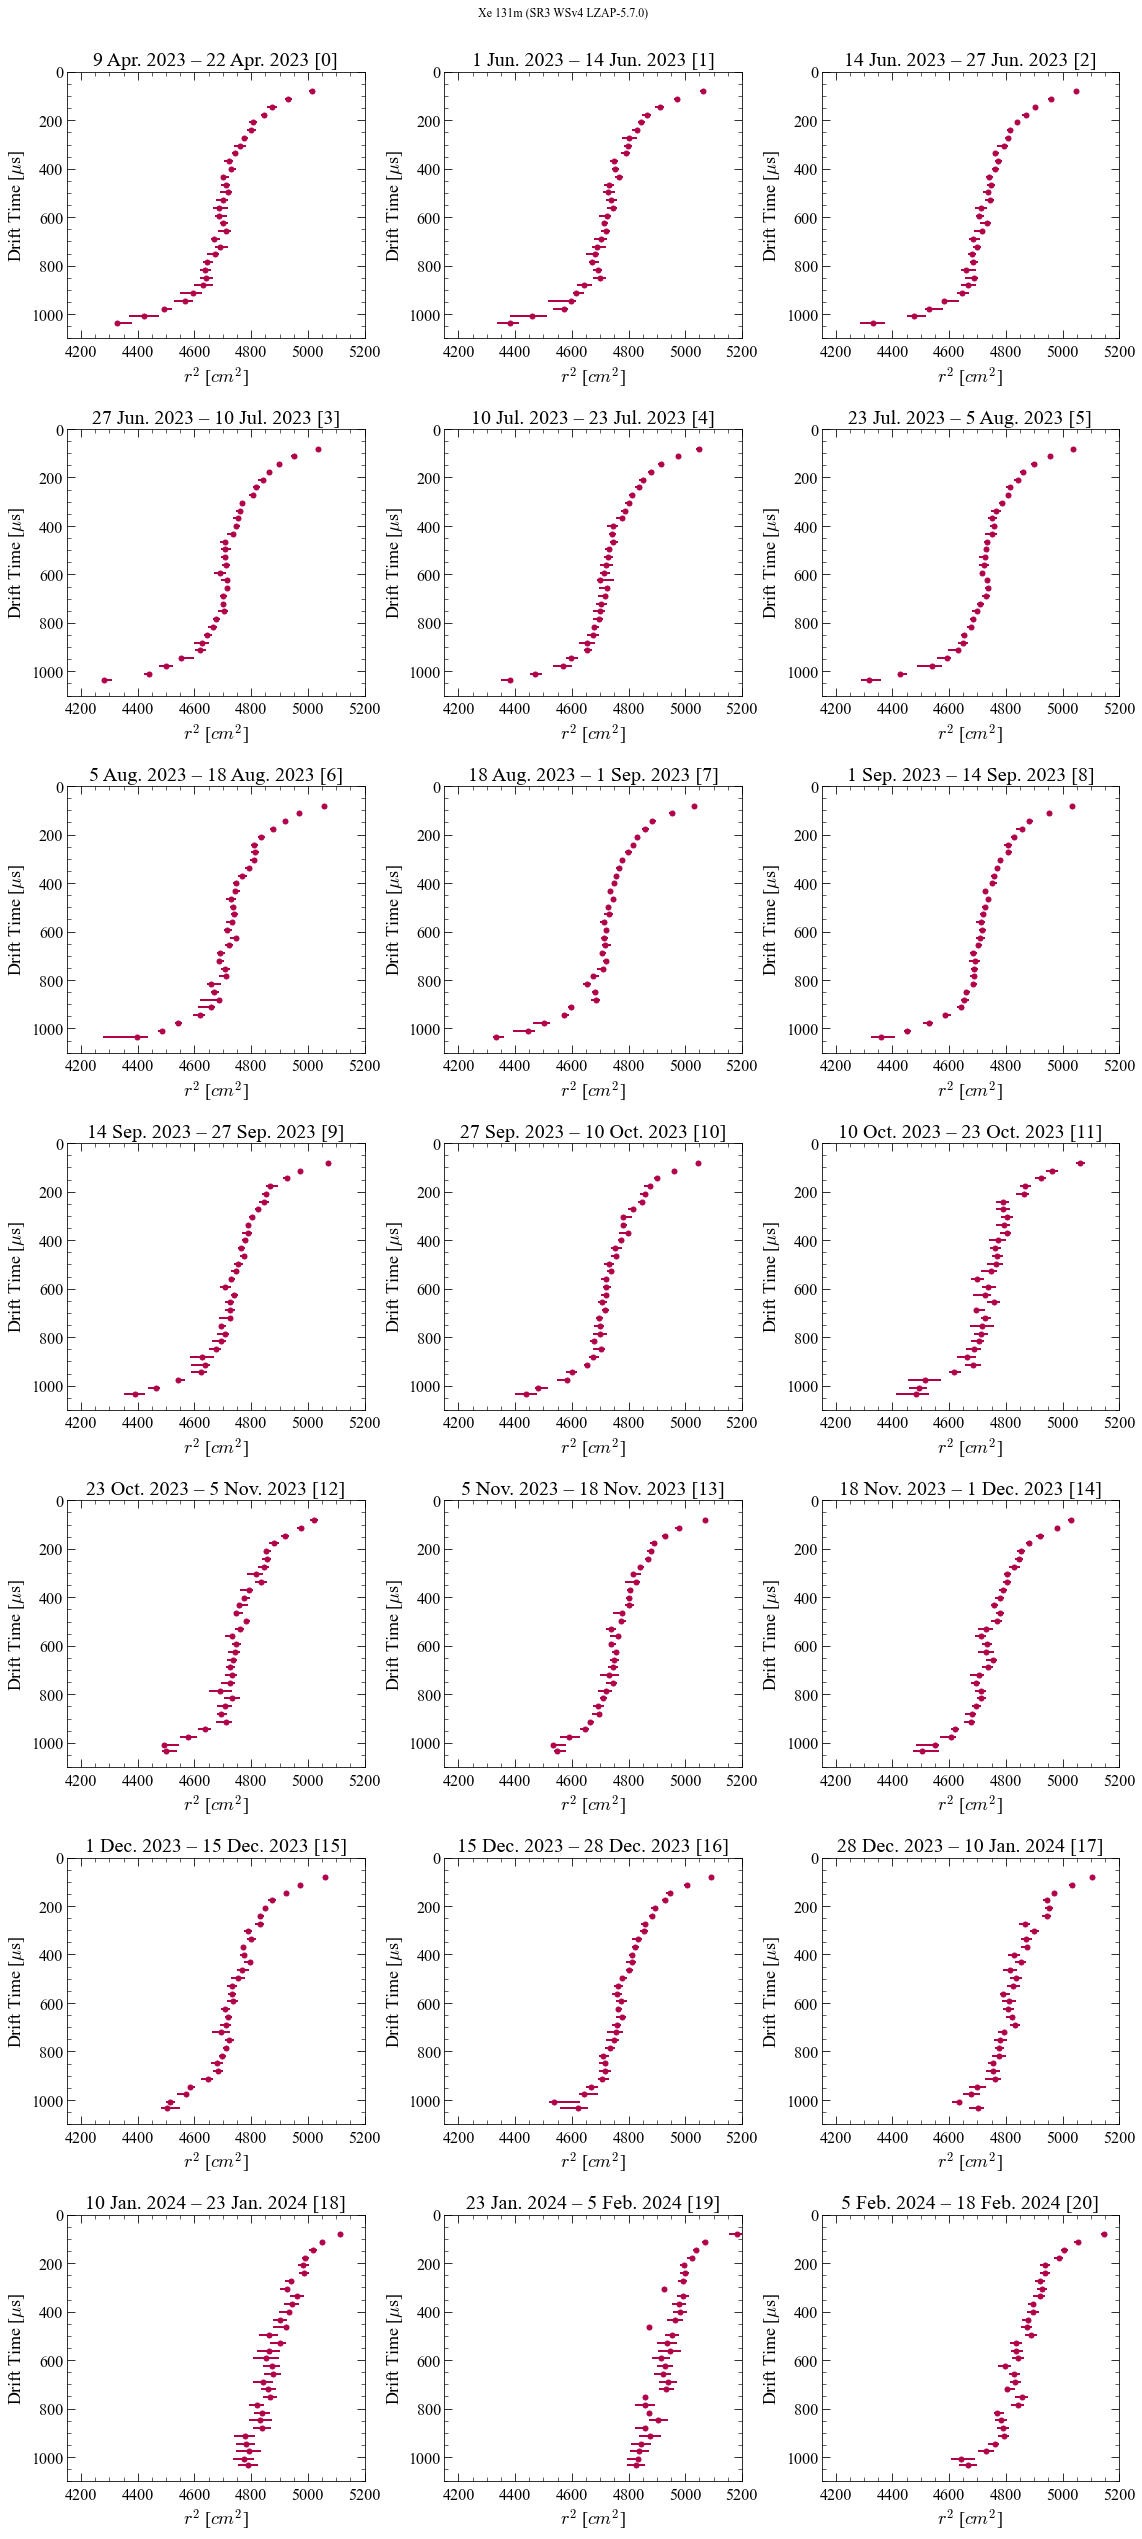

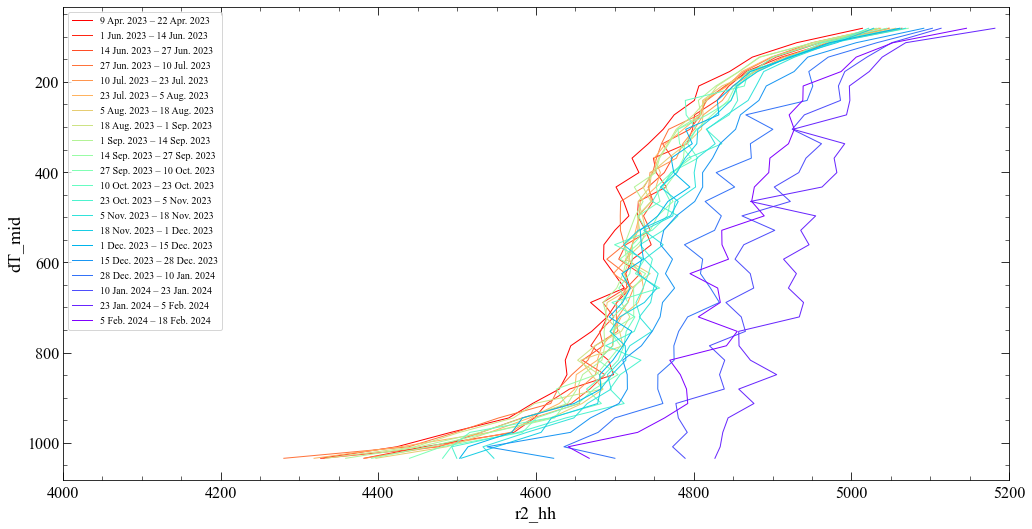

In [22]:
plots_per_row = 3

wall_plots(plots_per_row, r2_hh, d_r2_hh, dT_mid, t_cal_str, good_mask, flag = False, x_range=[4150,5200], y_range=[1100,0])


In [23]:
# make a wall_plots with spectra in the background for each one 

def wall_plots_w_spectra(r2_spectra, dT_spectra, \
                         r2_points_all, d_r2_points_all, dT_mid_points, \
                         date_range_all, good_mask, \
                         n_slice_tot=n_slice_tot, plots_per_row=3, \
                         x_range=None, y_range=None, \
                         flag=False, source_string='Xe 131m'):
    
    if flag == True:
        print(f"len(r2_spectra) = {len(r2_spectra)}")
        print(f"len(dT_spectra) = {len(dT_spectra)}")
        print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        print(f"___________________________________________")
        print()
    
    # create an array of the original indices of calendar time  
    cal_t_index_OG = np.arange(len(date_range_all))
    
    # applying good_mask to all variables (no nans for calendar date needed here)
    date_range  = date_range_all[good_mask]
    r2_points   = r2_points_all[good_mask]
    d_r2_points = d_r2_points_all[good_mask]
    n_slice_tot = n_slice_tot[good_mask]
    
    # getting original indices
    cal_t_index_cut = np.arange(len(date_range))
    cal_t_index = cal_t_index_OG[good_mask]
    
    # set up subplot layout
    ppr = [plots_per_row] * math.ceil(len(r2_points) / plots_per_row) 
    ppr[-1] = len(r2_points) - sum(ppr[:-1]) 
    num_rows = len(ppr)

    # Set up the figure and subplots
    fig, axs = plt.subplots(num_rows, max(ppr), figsize=(24, num_rows * 9))

    # Flatten the axs array for easier indexing
    axs = axs.flatten()
    
    for i in range(len(r2_points)):

        if flag == True:
            print(f"i={i}")
            print()
            print(f"r2_points[i].shape   = {r2_points[i].shape}")
            print(f"d_r2_points[i].shape = {d_r2_points[i].shape}")
            print
            print(f"___________________________________________")
            print()
        
        ax = axs[i]

        # plot spectra
        num_bins_events = 70
        # min_x = 3000.
        # max_x = 5600.
        # min_y = 1100. 
        # max_y = -10.
        # plot_range_events = [[min_x,max_x], [max_y,min_y]]
        plot_range_events = [x_range, y_range[::-1]]
        
        ax.hist2d(r2_sel_spectra[i], dT_sel_spectra[i], bins = num_bins_events, \
                  range = plot_range_events, norm = colors.LogNorm(), \
                  cmin = 1, alpha = 0.2, cmap = "plasma", zorder=1)

        # plot spaghetti lines
        ax.plot(r2_points[i], dT_mid_points, label=date_range[i], \
                linewidth=3, color='xkcd:sky blue', zorder=10)
        
        # plot points with error
        ax.errorbar(r2_points[i], dT_mid_points, xerr=d_r2_points[i], \
                    markersize=7, linewidth=1.5, capsize=4.5, capthick=1.5, \
                    fmt='o', color='xkcd:deep sky blue', zorder=100)
        
        n_slice_tot_sci = "{:.1e}".format(n_slice_tot[i])
        ax.set_title(f"({cal_t_index[i]}) {date_range[i]} [$n_{{total}} = ${n_slice_tot_sci}]", y=1.02, fontsize=24) 
        ax.invert_yaxis()  # Flip the y-axis
        ax.set_ylabel('$t_{{drift}}$ [$\mu$s]', fontsize=24, labelpad=10)
        ax.set_xlabel('$r^2$ [${cm}^2$]', fontsize=24, labelpad=10)
        # ax.legend(handlelength=0, labelcolor='xkcd:deep sky blue')

        if x_range:
            ax.set_xlim(x_range)

        if y_range:
            ax.set_ylim(y_range)

        # Adjust spacing between subplots
        fig.tight_layout(pad=2.0)
        
    # Add main title above the subplots
    main_title = f"{source_string} (SR3 WSv4 LZAP-5.7.0)"
    fig.suptitle(main_title, y=1.03, fontsize=30)

    # Remove empty subplots
    for i in range(len(r2_points), num_rows * max(ppr)):
        fig.delaxes(axs[i])  

In [44]:
print(type(r2_sel_spectra))

<class 'list'>


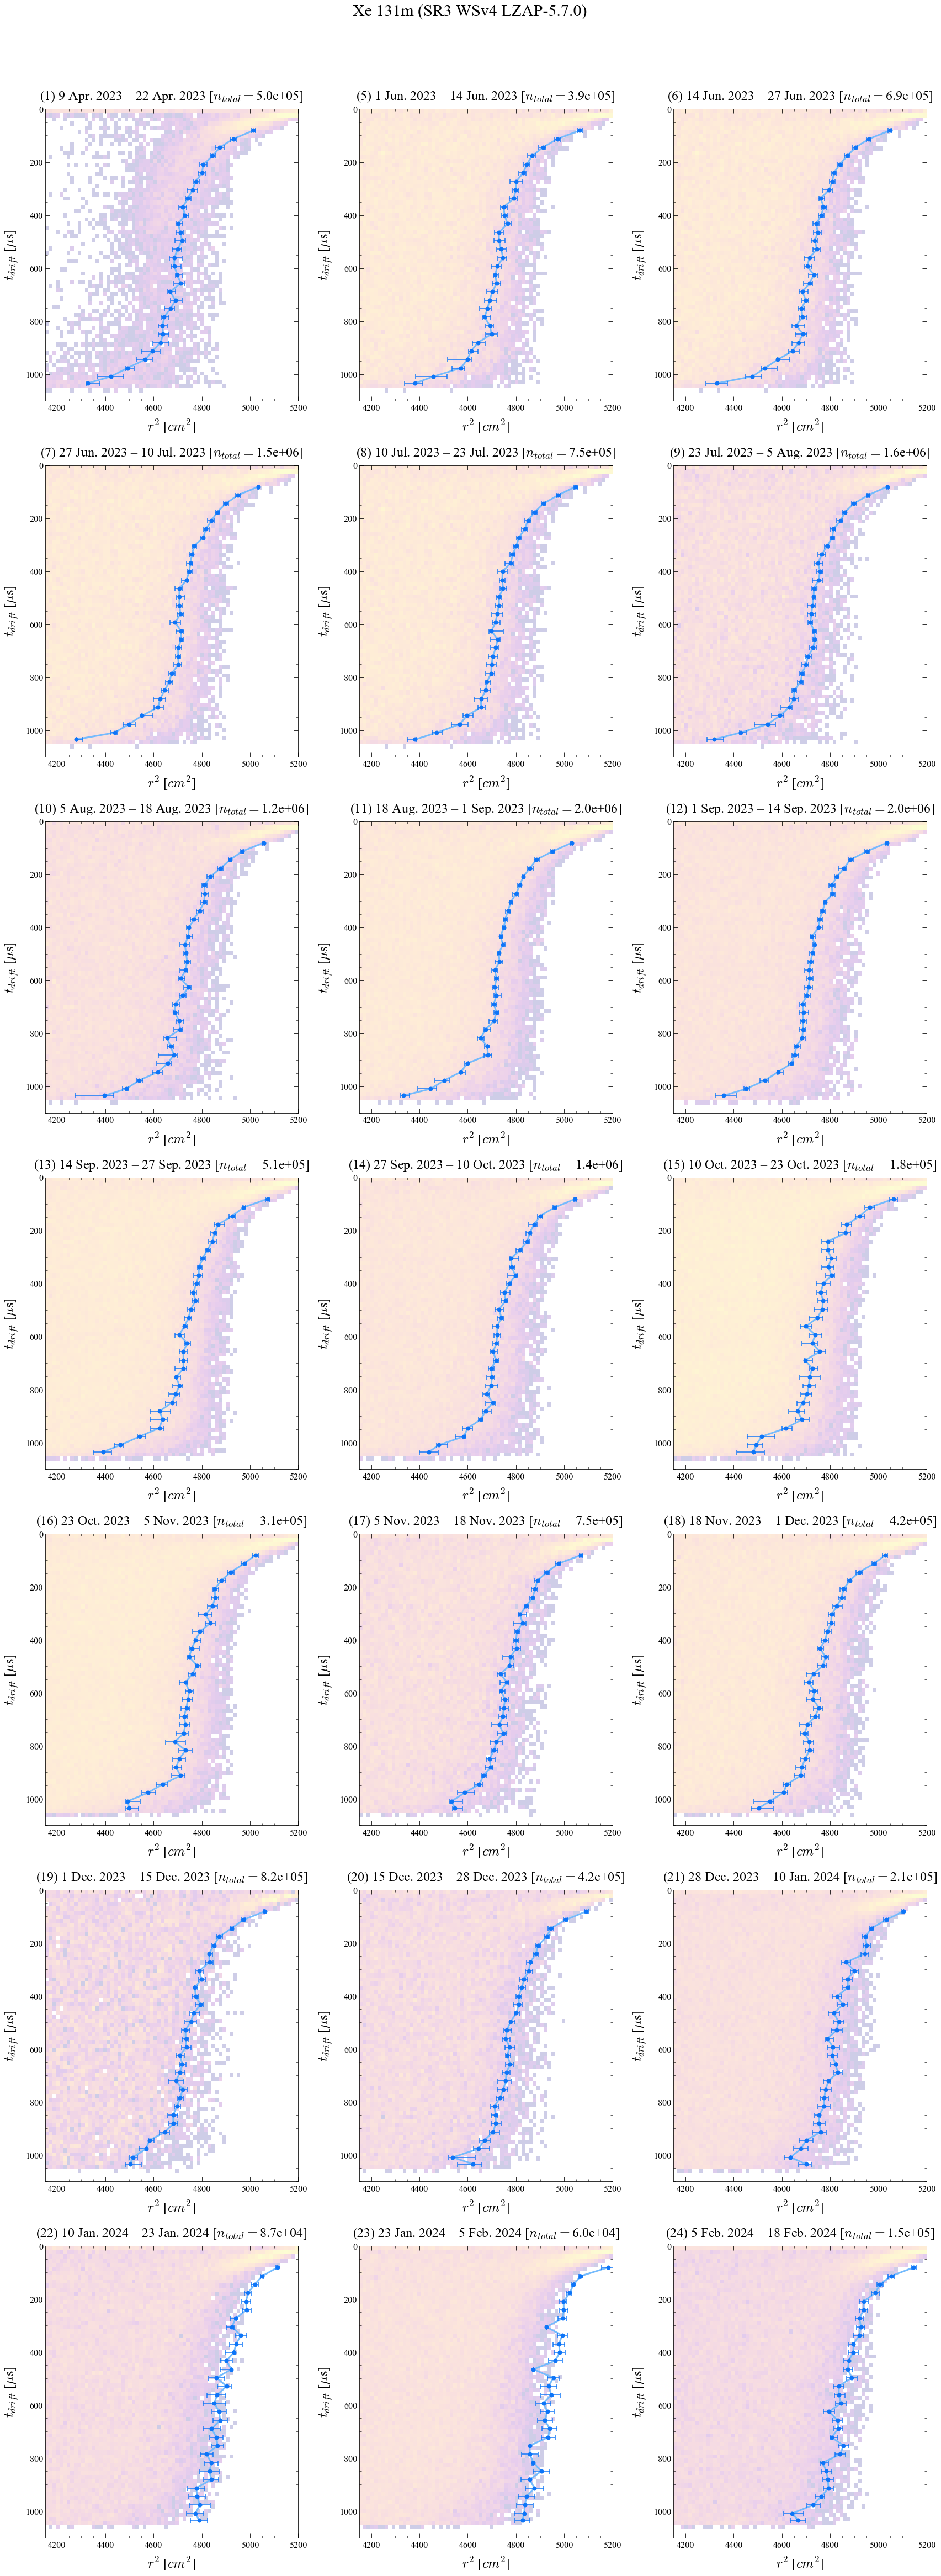

In [24]:
# get wall point plots with spectra

wall_plots_w_spectra(r2_sel_spectra, dT_sel_spectra, \
                     r2_hh, d_r2_hh, dT_mid, \
                     t_cal_str, good_mask, \
                     x_range=[4150,5200], y_range=[1100,0], \
                     flag=False)


## Plot Wall with Error Bars from $r^2$ Position Only

In [25]:
def get_shape(lst):
    
    list_shape = []
    
    for x in range(len(lst)):
        y = len(lst[x])
        
        list_shape.append(y)
        
    return list_shape

In [26]:
print(r2_hh.shape)

(25, 31)


In [27]:
print(dT_mid)

[  81.   113.   145.   177.   209.   241.   273.   305.   337.   369.
  401.   433.   465.   497.   529.   561.   593.   625.   657.   689.
  721.   753.   785.   817.   849.   881.   913.   945.   977.  1009.
 1034.5]


In [28]:
print(t_cal_str)
print()
print()

['27 Mar. 2023 – 9 Apr. 2023' '9 Apr. 2023 – 22 Apr. 2023'
 '22 Apr. 2023 – 5 May. 2023' '5 May. 2023 – 19 May. 2023'
 '19 May. 2023 – 1 Jun. 2023' '1 Jun. 2023 – 14 Jun. 2023'
 '14 Jun. 2023 – 27 Jun. 2023' '27 Jun. 2023 – 10 Jul. 2023'
 '10 Jul. 2023 – 23 Jul. 2023' '23 Jul. 2023 – 5 Aug. 2023'
 '5 Aug. 2023 – 18 Aug. 2023' '18 Aug. 2023 – 1 Sep. 2023'
 '1 Sep. 2023 – 14 Sep. 2023' '14 Sep. 2023 – 27 Sep. 2023'
 '27 Sep. 2023 – 10 Oct. 2023' '10 Oct. 2023 – 23 Oct. 2023'
 '23 Oct. 2023 – 5 Nov. 2023' '5 Nov. 2023 – 18 Nov. 2023'
 '18 Nov. 2023 – 1 Dec. 2023' '1 Dec. 2023 – 15 Dec. 2023'
 '15 Dec. 2023 – 28 Dec. 2023' '28 Dec. 2023 – 10 Jan. 2024'
 '10 Jan. 2024 – 23 Jan. 2024' '23 Jan. 2024 – 5 Feb. 2024'
 '5 Feb. 2024 – 18 Feb. 2024']




In [29]:
# get variables as arrays with all bad calendar dates and all bad r2 values as nans
"""
CHECK TRANSPOSE WORKS CORRECTLY WITH 3D
d_r2_points = np.transpose(d_r2_points_all, (0, 2, 1))
"""
# tranpose d_r2_hh into the correct shape
print(f"shape: d_r2_hh      = {d_r2_hh.shape}")
d_r2_hh = np.transpose(d_r2_hh, (0, 2, 1))
print(f"shape: d_r2_hh      = {d_r2_hh.shape}")
print()

# create good mask that will work for the shape of d_r2_hh
r2_good_mask_dim_d_r2_hh                     = r2_good_mask[:, :, np.newaxis]
print(f"shape: r2_good_mask_dim_d_r2_hh      = {r2_good_mask_dim_d_r2_hh.shape}")
print()

# for dim (num t_cal ints, num dT ints)
r2_dim_calT_dT      = np.where(r2_good_mask, r2_hh, np.nan)
d_r2_dim_calT_dT    = np.where(r2_good_mask_dim_d_r2_hh, d_r2_hh, np.nan)
n_slice_dim_calT_dT = np.where(r2_good_mask, n_slice, np.nan)
dT_dim_calT_dT      = np.tile(dT_mid, (len(r2_dim_calT_dT),1))

# print shapes to confirm 
print(f"shape: r2_dim_calT_dT      = {r2_dim_calT_dT.shape}")
print(f"shape: d_r2_dim_calT_dT    = {d_r2_dim_calT_dT.shape}")
print(f"shape: n_slice_dim_calT_dT = {n_slice_dim_calT_dT.shape}")
print(f"shape: dT_dim_calT_dT      = {dT_dim_calT_dT.shape}")

print()

# for dim (num dT ints, num t_cal ints)
r2_dim_dT_calT      = np.transpose(r2_dim_calT_dT)
d_r2_dim_dT_calT    = np.transpose(d_r2_dim_calT_dT, (2, 1, 0))
n_slice_dim_dT_calT = np.transpose(n_slice_dim_calT_dT)
dT_dim_dT_calT      = np.transpose(dT_dim_calT_dT)

# print shapes to confirm 
print(f"shape: r2_dim_dT_calT      = {r2_dim_dT_calT.shape}")
print(f"shape: d_r2_dim_dT_calT    = {d_r2_dim_dT_calT.shape}")
print(f"shape: n_slice_dim_dT_calT = {n_slice_dim_dT_calT.shape}")
print(f"shape: dT_dim_dT_calT      = {dT_dim_dT_calT.shape}")


shape: d_r2_hh      = (25, 2, 31)
shape: d_r2_hh      = (25, 31, 2)

shape: r2_good_mask_dim_d_r2_hh      = (25, 31, 1)

shape: r2_dim_calT_dT      = (25, 31)
shape: d_r2_dim_calT_dT    = (25, 31, 2)
shape: n_slice_dim_calT_dT = (25, 31)
shape: dT_dim_calT_dT      = (25, 31)

shape: r2_dim_dT_calT      = (31, 25)
shape: d_r2_dim_dT_calT    = (2, 31, 25)
shape: n_slice_dim_dT_calT = (31, 25)
shape: dT_dim_dT_calT      = (31, 25)


In [30]:


def plot_dT_vs_r2_with_rerr(r2_dim_calT_dT, d_r2_dim_calT_dT, dT_dim_calT_dT, good_mask, t_cal_str_all_ints, source_string, r_events, dT_events):

    print(d_r2_dim_calT_dT)
    print()
    # print(r2_dim_calT_dT)
    
    mpl.rcParams['legend.handlelength'] = 1
    # mpl.rcParams['legend.markerscale'] = 1
    
    # apply good mask to all variables (we don't need calendar time nans here)
    t_cal_str        = t_cal_str_all_ints[good_mask]
    
    r2_dim_calT_dT   = r2_dim_calT_dT[good_mask]
    d_r2_dim_calT_dT = d_r2_dim_calT_dT[good_mask]
    dT_dim_calT_dT   = dT_dim_calT_dT[good_mask]
    r_dim_calT_dT    = np.sqrt(r2_dim_calT_dT)
    d_r_dim_calT_dT  = np.sqrt(d_r2_dim_calT_dT)
    
    # transpose the matrices
    r2_dim_dT_calT   = np.transpose(r2_dim_calT_dT)
    d_r2_dim_dT_calT = np.transpose(d_r2_dim_calT_dT)
    dT_dim_dT_calT   = np.transpose(dT_dim_calT_dT)
    r_dim_dT_calT    = np.sqrt(r2_dim_dT_calT)
    d_r_dim_dT_calT  = np.sqrt(d_r2_dim_dT_calT)
    
    # get the min, mean, max, and stddev of all drift time slices

    # create empty matrices for min, mean, max of all drift time slices
    mean_r2     = []
    min_r2      = []
    max_r2      = []
    stddev_r2   = []
    stddev_r    = []
    err_r2_2sig = []
    err_r_2sig  = []
    err_r2      = []
    err_r       = []
    
    for i in range(len(r2_dim_dT_calT)):
        
        # get values
        mean_r2_dT     = np.nanmean(r2_dim_dT_calT[i])
        min_r2_dT      = np.nanmin(r2_dim_dT_calT[i])
        max_r2_dT      = np.nanmax(r2_dim_dT_calT[i])
        stddev_r2_dT   = np.nanstd(r2_dim_dT_calT[i])
        err_r2_2sig_dT = np.nanmean(d_r2_dim_dT_calT[:,i])
        err_r2_dT      = np.sqrt((stddev_r2_dT)**2 + (err_r2_2sig_dT)**2)
        
        # add values to empty lists
        mean_r2.append(mean_r2_dT)
        min_r2.append(min_r2_dT)
        max_r2.append(max_r2_dT)
        stddev_r2.append(stddev_r2_dT)
        err_r2_2sig.append(err_r2_2sig_dT)
        err_r2.append(err_r2_dT)
    
    for i in range(len(r_dim_dT_calT)):
        stddev_r_dT   = np.nanstd(r_dim_dT_calT[i])
        err_r_2sig_dT = np.nanmean(d_r_dim_dT_calT[:,i])
        err_r_dT      = np.sqrt((stddev_r_dT)**2 + (err_r_2sig_dT)**2)
        stddev_r.append(stddev_r_dT)
        err_r_2sig.append(err_r_2sig_dT)
        err_r.append(err_r_dT)
        
        
    # get r-values
    
    mean_r   = np.sqrt(mean_r2)
    min_r    = np.sqrt(min_r2)
    max_r    = np.sqrt(max_r2)
    
    # plot the points with min-r and max-r as their error bars 
    # Set up the figure and axes for subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,13))

    # Initialize lists to collect valid points as nested lists
    r_valid = [[] for _ in range(len(r_dim_calT_dT))]
    dT_valid = [[] for _ in range(len(r_dim_calT_dT))]
    
    min_x_value = 62
    max_x_value = 72.
    min_y_value = 1100. 
    max_y_value = 0.
    
    for i in range(len(r_dim_calT_dT)):
        
        for j in range(len(r_dim_calT_dT[i])):
            
            r_plot  = r_dim_calT_dT[i][j]
            dT_plot = dT_dim_calT_dT[i][j]

            if not np.isnan(r_plot) and not np.isnan(dT_plot):
                
                r_valid[i].append(r_plot)
                dT_valid[i].append(dT_plot)
    
    handles1_err = []
    labels1_err  = []
    
    for j in range(len(mean_r)):
        ax1_r_err_low          = [mean_r[j] - min_r[j]]
        ax1_r_err_high         = [max_r[j] - mean_r[j]]
        ax1_r_err_low_num      = round(min_r[j], 1)
        ax1_r_err_high_num     = round(max_r[j], 1)
        ax1_r_err_label        = f"{ax1_r_err_low_num} cm — {ax1_r_err_high_num} cm"
        
        # Plot points with error bars for plot aesthetic
        ax1.errorbar(mean_r[j], dT_mid[j], xerr=[ax1_r_err_low, ax1_r_err_high], marker='o',color='k', capsize=6, capthick=2.5, linewidth=2.5, zorder=20)#, label=ax1_r_err_label)
        
        # Plot points with smaller error bars and no markers for plot aesthetic
        handles1_err_j = ax1.errorbar(mean_r[j], dT_mid[j], xerr=[ax1_r_err_low, ax1_r_err_high], marker="None", color='k', capsize=5, capthick=2, zorder=10, label=ax1_r_err_label)
        
        handles1_err.append(handles1_err_j)
        labels1_err.append(ax1_r_err_label)
    
    ax1.set_xlim(min_x_value, max_x_value)  
    ax1.set_ylim(min_y_value, max_y_value) 
    ax1.set_xlabel('$r$ [cm]', fontsize=26)
    ax1.set_ylabel('$t_{\, {drift}}$ [$\mu$s]', fontsize=26)
    ax1.set_title('Error bars: $r_{\, {min}}$ $—$ $r_{\, {max}}$', y=1.01, fontsize=32)

    handles2_err = []
    labels2_err  = []
    
    for i in range(len(mean_r)):
        ax2_r_err_low_num  = round((mean_r[i] - stddev_r[i]), 1)
        ax2_r_err_high_num = round((mean_r[i] + stddev_r[i]), 1)
        ax2_r_err_label_i  = f"{ax2_r_err_low_num} cm — {ax2_r_err_high_num} cm"
        labels2_err.append(ax2_r_err_label_i)
        
    for i in range(len(mean_r)):
        
        # Plot points with error bars for plot aesthetic
        ax2.errorbar(mean_r[i], dT_mid[i], xerr=stddev_r[i], yerr=None, marker="o", markersize=7, color='k', capsize=6, capthick=3, linewidth=3, zorder=20)#, label=labels2_err[i])

        # Plot points with smaller error bars and no markers for plot aesthetic
        handles2_err_i = ax2.errorbar(mean_r[i], dT_mid[i], xerr=stddev_r[i], yerr=None, marker="None", color='k', capsize=5, capthick=2, zorder=10, label=labels2_err[i])

#         # USING NEWLY CALCULATED ERROR INCLUDING STATISTICAL ERROR FROM FITTING R2 VALUES (VERY BAD)
#         # Plot points with error bars for plot aesthetic
#         ax2.errorbar(mean_r[i], dT_mid[i], xerr=err_r[i], yerr=None, marker="o", markersize=7, color='k', capsize=6, capthick=3, linewidth=3, zorder=20)#, label=labels2_err[i])

#         # Plot points with smaller error bars and no markers for plot aesthetic
#         handles2_err_i = ax2.errorbar(mean_r[i], dT_mid[i], xerr=err_r[i], yerr=None, marker="None", color='k', capsize=5, capthick=2, zorder=10, label=labels2_err[i])

        handles2_err.append(handles2_err_i)
    
    ax2.set_xlim(min_x_value, max_x_value)  
    ax2.set_ylim(min_y_value, max_y_value)
    ax2.set_xlabel('$r$ [cm]', fontsize=26)
    ax2.set_ylabel('$t_{\, {drift}}$ [$\mu$s]', fontsize=26)
    ax2.set_title('Error bars: ($r - \sigma_{r}$) $—$ ($r + \sigma_{r}$)', y=1.01, fontsize=32)

    # Colors to use:
    colorlist = plt.cm.rainbow(np.linspace(0, 1, len(t_cal_str)))
    
    handles1_cal = []
    handles2_cal = []
    
    for k in range(len(t_cal_str)):
        
        ax1.plot(r_valid[k], dT_valid[k], linewidth=2, color=colorlist[k])#, label = f"{t_cal_str[k]}")
        ax2.plot(r_valid[k], dT_valid[k], linewidth=2, color=colorlist[k])#, label = f"{t_cal_str[k]}")
        
        handles1_cal_k = mpatches.Patch(color=colorlist[k], label = f"{t_cal_str[k]}")
        handles2_cal_k = mpatches.Patch(color=colorlist[k], label = f"{t_cal_str[k]}")
        handles1_cal.append(handles1_cal_k)
        handles2_cal.append(handles2_cal_k)
    
    num_bins_events   = 120
    plot_range_events = [[min_x_value,max_x_value], [max_y_value,min_y_value]]
    
    h_events1 = ax1.hist2d(r_events, dT_events, bins = num_bins_events, range = plot_range_events, norm = colors.LogNorm(), cmin = 1, alpha = 0.2, cmap = "plasma")#, cmap = "bone"
    h_events2 = ax2.hist2d(r_events, dT_events, bins = num_bins_events, range = plot_range_events, norm = colors.LogNorm(), cmin = 1, alpha = 0.2, cmap = "plasma")
    
    # Add a blank entry for space after the last label
    handles1_blank = ax1.plot([], [], ' ', label=' ')
    handles2_blank = ax2.plot([], [], ' ', label=' ')
    
    handles1 = handles1_cal + handles1_blank + handles1_err
    handles2 = handles2_cal + handles2_blank + handles2_err
    
    # After creating the legend objects
    legend1 = ax1.legend(handles=handles1, loc=(0.025,0.0085), fontsize=9.5)
    legend2 = ax2.legend(handles=handles2, loc=(0.025,0.0085), fontsize=9.5)

    # Set the facecolor of the legend to white
    legend1.legendPatch.set_facecolor('white')
    legend2.legendPatch.set_facecolor('white')
    legend1.get_frame().set_alpha(1)
    legend2.get_frame().set_alpha(1)
    
    # Adjust spacing between subplots
    fig.tight_layout(pad=2.0)

    print()
    # Add main title above the subplots
    main_title    = f"{source_string} (SR3 WSv4 LZap-5.7.0)"
    fig.suptitle(main_title, y=1.005, fontsize=44)


        # print(f"len(t_cal_str) = {len(t_cal_str)}")
    # print(f"t_cal_str[8]   = {t_cal_str[8]}")
    # print()
    # print(f"len(r_valid)   = {len(r_valid)}")
    # print(f"r_valid[8]     = {r_valid[8]}")
    # print()
    # print(f"len(r)         = {len(r)}")
    # print(f"r[8]           = {r[8]}")
    # print()
    # print()
    
    ax1.invert_yaxis()
    ax2.invert_yaxis()
    
    return 


In [31]:
"""
ADD POLYNOMIAL FIT PLOT TO HAVE IN ADDITION TO SQUIGGLE PLOT 
"""

'\nADD POLYNOMIAL FIT PLOT TO HAVE IN ADDITION TO SQUIGGLE PLOT \n'

[[[        nan         nan]
  [        nan         nan]
  [        nan         nan]
  ...
  [        nan         nan]
  [        nan         nan]
  [        nan         nan]]

 [[ 9.62541489  9.62541489]
  [12.02792196 12.02792196]
  [17.37000158 17.92318634]
  ...
  [ 6.40123995 27.0154025 ]
  [55.58285558 51.65165165]
  [ 4.59947127 51.16911784]]

 [[        nan         nan]
  [        nan         nan]
  [        nan         nan]
  ...
  [        nan         nan]
  [        nan         nan]
  [        nan         nan]]

 ...

 [[ 6.72672673  0.82215549]
  [ 8.36657553  5.52193985]
  [14.18388085 14.26881427]
  ...
  [44.57791124 44.31097764]
  [35.7033957  35.7033957 ]
  [35.53742422 35.85472265]]

 [[27.23850611 27.23850611]
  [ 8.89165027  0.        ]
  [11.10929111  0.91728092]
  ...
  [33.31023331 33.63363363]
  [39.74883975  2.75184275]
  [31.91763192 30.2016302 ]]

 [[11.0990991  11.0990991 ]
  [12.74537696 12.74537696]
  [12.39133871 12.39133871]
  ...
  [26.23423423 29.821821

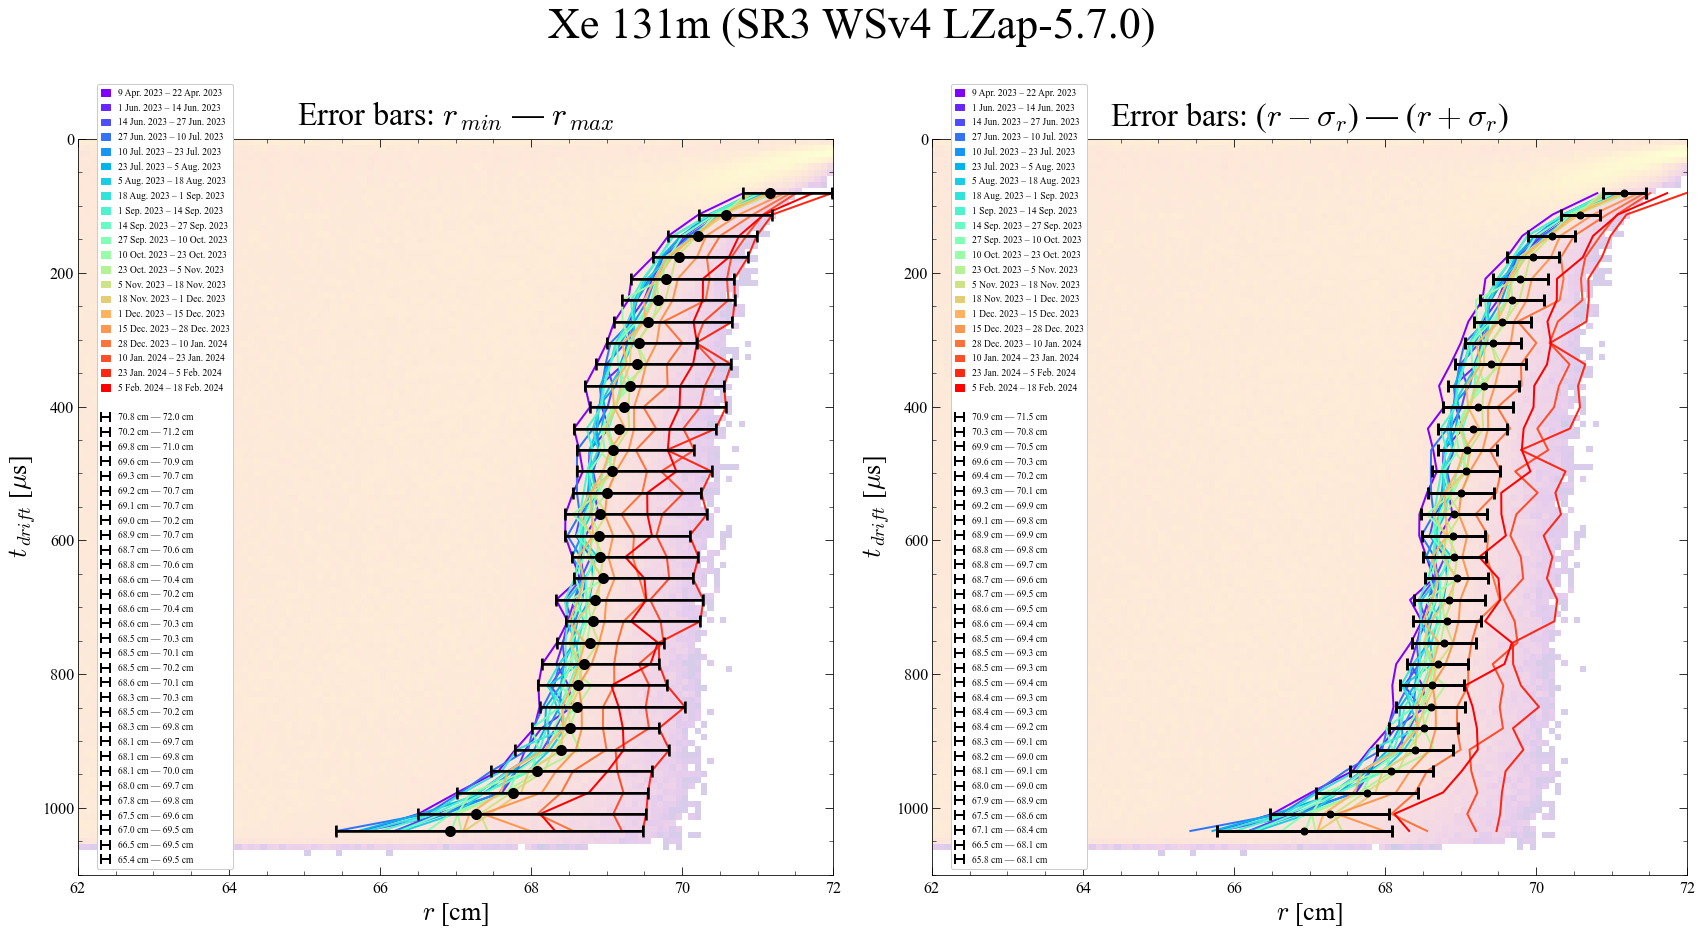

In [32]:
# output lists of dim = (dT, calT) [here dim = (31, 19)]

plot_dT_vs_r2_with_rerr(r2_dim_calT_dT, d_r2_dim_calT_dT, dT_dim_calT_dT, good_mask, \
                         t_cal_str, source_string = 'Xe 131m', \
                         r_events = r_events_2sig, dT_events = dT_events_2sig)

plt.savefig('dT-vs-r_points-error-and-histo_plot_all-dT-slices.png', dpi=300, bbox_inches='tight')

In [33]:
def plot_dT_vs_r2_just_points(r2_dim_calT_dT, d_r2_dim_calT_dT, dT_dim_calT_dT, good_mask, \
                              source_string, r_events, dT_events, num_edge_points=5):

    mpl.rcParams['legend.handlelength'] = 1
    # mpl.rcParams['legend.markerscale'] = 1
    
    n_pts = num_edge_points
    
    # apply good mask to all variables (we don't need calendar time nans here)
    r2_dim_calT_dT   = r2_dim_calT_dT[good_mask]
    d_r2_dim_calT_dT = d_r2_dim_calT_dT[good_mask]
    dT_dim_calT_dT   = dT_dim_calT_dT[good_mask]
    r_dim_calT_dT    = np.sqrt(r2_dim_calT_dT)
    d_r_dim_calT_dT  = np.sqrt(d_r2_dim_calT_dT)
    
    # transpose the matrices
    r2_dim_dT_calT   = np.transpose(r2_dim_calT_dT)
    d_r2_dim_dT_calT = np.transpose(d_r2_dim_calT_dT)
    dT_dim_dT_calT   = np.transpose(dT_dim_calT_dT)
    r_dim_dT_calT    = np.sqrt(r2_dim_dT_calT)
    d_r_dim_dT_calT  = np.sqrt(d_r2_dim_dT_calT)
    
    # get the min, mean, max, and stddev of all drift time slices

    # create empty matrices for min, mean, max of all drift time slices
    mean_r2     = []
    min_r2      = []
    max_r2      = []
    stddev_r2   = []
    stddev_r    = []
    err_r2_2sig = []
    err_r_2sig  = []
    err_r2      = []
    err_r       = []
    
    for i in range(len(r2_dim_dT_calT)):
        
        # get values
        mean_r2_dT     = np.nanmean(r2_dim_dT_calT[i])
        min_r2_dT      = np.nanmin(r2_dim_dT_calT[i])
        max_r2_dT      = np.nanmax(r2_dim_dT_calT[i])
        stddev_r2_dT   = np.nanstd(r2_dim_dT_calT[i])
        err_r2_2sig_dT = np.nanmean(d_r2_dim_dT_calT[:,i])
        err_r2_dT      = np.sqrt((stddev_r2_dT)**2 + (err_r2_2sig_dT)**2)
        
        # add values to empty lists
        mean_r2.append(mean_r2_dT)
        min_r2.append(min_r2_dT)
        max_r2.append(max_r2_dT)
        stddev_r2.append(stddev_r2_dT)
        err_r2_2sig.append(err_r2_2sig_dT)
        err_r2.append(err_r2_dT)
    
    for i in range(len(r_dim_dT_calT)):
        stddev_r_dT   = np.nanstd(r_dim_dT_calT[i])
        err_r_2sig_dT = np.nanmean(d_r_dim_dT_calT[:,i])
        err_r_dT      = np.sqrt((stddev_r_dT)**2 + (err_r_2sig_dT)**2)
        stddev_r.append(stddev_r_dT)
        err_r_2sig.append(err_r_2sig_dT)
        err_r.append(err_r_dT)
        
        
    # get r-values
    
    mean_r   = np.sqrt(mean_r2)
    min_r    = np.sqrt(min_r2)
    max_r    = np.sqrt(max_r2)
    
    # plot the points with min-r and max-r as their error bars 
    # Set up the figure and axes for subplots
    fig, ax = plt.subplots(1, figsize=(9,15))
    
    for j in range(len(mean_r)):
        
        if j < n_pts:
            ax.scatter(mean_r[j], dT_mid[j], marker='o', s=150, color='xkcd:bright red', zorder=20)
            #ax.scatter(mean_r[j], dT_mid[j], marker='o', s=200, color='k', zorder=10)
            
        elif len(mean_r) - j <= n_pts:
            ax.scatter(mean_r[j], dT_mid[j], marker='o', s=150, color='xkcd:lightish blue', zorder=20)
            #ax.scatter(mean_r[j], dT_mid[j], marker='o', s=200, color='k', zorder=10)
        
        else:
            ax.scatter(mean_r[j], dT_mid[j], marker='o', s=150, color='xkcd:medium green', zorder=20)
            #ax.scatter(mean_r[j], dT_mid[j], marker='o', s=200, color='k', zorder=10)
    
    min_x_value = 64.4
    max_x_value = 72.2
    min_y_value = 1100. 
    max_y_value = 0.
    
    ax.set_xlim(min_x_value, max_x_value)  
    ax.set_ylim(min_y_value, max_y_value) 
    ax.set_xlabel('$r$ [cm]', fontsize=28, labelpad=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.set_ylabel('$t_{\, {drift}}$ [$\mu$s]', fontsize=28, labelpad=20)
    ax.tick_params(axis='y', labelsize=20)
    #ax.set_title('Error bars: $r_{\, {min}}$ $—$ $r_{\, {max}}$', y=1.01, fontsize=32)


    # plot histogram 
    num_bins_events   = 120
    plot_range_events = [[min_x_value,max_x_value], [max_y_value,min_y_value]]
    
    h_events = ax.hist2d(r_events, dT_events, bins = num_bins_events, range = plot_range_events, norm = colors.LogNorm(), cmin = 1, alpha = 0.15, cmap = "plasma")#, cmap = "bone"
    
    print()
    # # Add main title above the subplots
    # main_title    = f"{source_string} (SR3 WSv4 LZap-5.7.0)"
    # fig.suptitle(main_title, y=1.005, fontsize=44)
    
    ax.invert_yaxis()
    
    return 


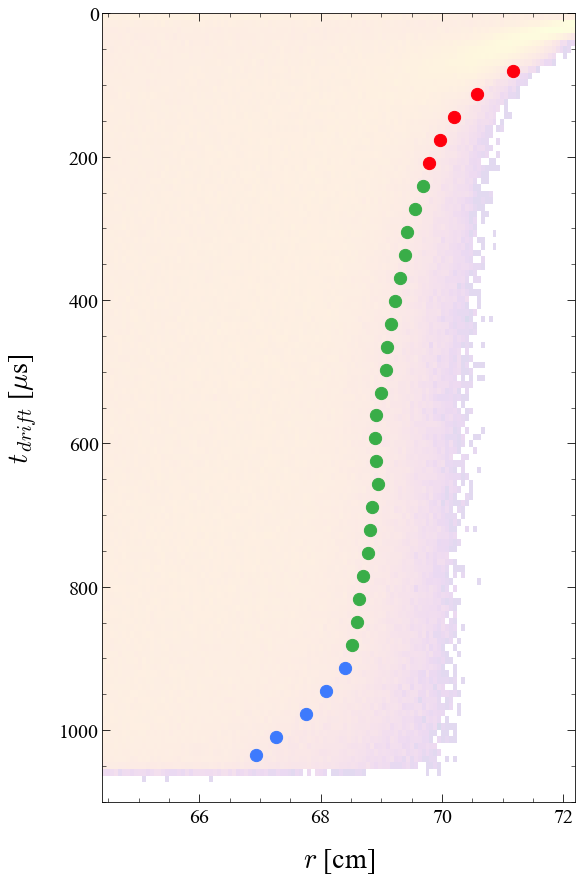

In [34]:

plot_dT_vs_r2_just_points(r2_dim_calT_dT, d_r2_dim_calT_dT, dT_dim_calT_dT, \
                          good_mask, source_string = 'Xe 131m', \
                          r_events = r_events_2sig, dT_events = dT_events_2sig, \
                          num_edge_points=5)

plt.savefig('dT-vs-r_points-and-histo_plot_all-dT-slices.png', dpi=300, bbox_inches='tight', pad_inches=0.2)


In [35]:


def plot_dT_vs_r2_with_rerr(r2_all, d_r2_all, dT_list, r2_good_mask_all, good_mask, t_cal_str_all, source_string, r_events, dT_events):

    # apply good mask to all variables (we don't need nans here)
    r2           = r2_all[good_mask]
    d_r2         = d_r2_all[good_mask]
    t_cal_str    = t_cal_str_all[good_mask]
    r2_good_mask = r2_good_mask_all[good_mask]
    
    mpl.rcParams['legend.handlelength'] = 1
    # mpl.rcParams['legend.markerscale'] = 1
    
    r   = np.sqrt(r2)
    d_r = np.sqrt(d_r2)
    
#     # print(f"dT_list = {dT_list}")
    
#     # declare empty 2d lists for r2 and dT with only "good" data points
#     r2_good_all      = []
#     d_r2_good_all    = []
#     dT_good_all      = []
    
    # Reshape dT_mid to match the shape of r2 and r2_good_mask
    dT = np.tile(dT_list, (len(r2),1))
    
    # apply the mask to the matrices
    r2_good_all   = np.where(r2_good_mask, r2, np.nan)
    r2_good_mask_expanded = r2_good_mask[..., np.newaxis]
    d_r2_good_all = np.where(r2_good_mask_expanded, d_r2, np.nan)
    #d_r2_good_all = np.where(r2_good_mask[:, np.newaxis], d_r2, np.nan)
    dT_good_all   = np.where(r2_good_mask, dT, np.nan)
    r2_good_all_shape   = get_shape(r2_good_all)
    d_r2_good_all_shape = get_shape(d_r2_good_all)
    dT_good_all_shape   = get_shape(dT_good_all)
    
    # print(f"r2_good_all_shape = {r2_good_all_shape}")
    
    # transpose the matrices
    r2_good_all   = np.transpose(r2_good_all)
    d_r2_good_all = np.transpose(d_r2_good_all)
    dT_good_all   = np.transpose(dT_good_all)
    r2_good_all_shape   = get_shape(r2_good_all)
    d_r2_good_all_shape = get_shape(d_r2_good_all)
    dT_good_all_shape   = get_shape(dT_good_all)
    
    # print(f"r2_good_all_shape = {r2_good_all_shape}")
    
    # get the min, mean, max, and stddev of all drift time slices

    # create empty matrices for min, mean, max of all drift time slices
    mean_r2     = []
    min_r2      = []
    max_r2      = []
    stddev_r2   = []
    stddev_r    = []
    err_r2_2sig = []
    err_r_2sig  = []
    err_r2      = []
    err_r       = []
    
    for i in range(len(r2_good_all)):
        
        # get values
        mean_r2_dT     = np.nanmean(r2_good_all[i])
        min_r2_dT      = np.nanmin(r2_good_all[i])
        max_r2_dT      = np.nanmax(r2_good_all[i])
        stddev_r2_dT   = np.nanstd(r2_good_all[i])
        err_r2_2sig_dT = np.nanmean(d_r2_good_all[:,i])
        err_r2_dT      = np.sqrt((stddev_r2_dT)**2 + (err_r2_2sig_dT)**2)
        
        # add values to empty lists
        mean_r2.append(mean_r2_dT)
        min_r2.append(min_r2_dT)
        max_r2.append(max_r2_dT)
        stddev_r2.append(stddev_r2_dT)
        err_r2_2sig.append(err_r2_2sig_dT)
        err_r2.append(err_r2_dT)
    
    r_good_all = np.sqrt(r2_good_all)
    d_r_good_all = np.sqrt(d_r2_good_all)
    r_good_all_shape = get_shape(r_good_all)
    
    # get r_good_all, dT_good_all with cal time, then drift time organization 
    r_good_all_cal_then_dT = np.transpose(r_good_all)
    dT_good_all_cal_then_dT = np.transpose(dT_good_all)
    
    # print(f"r_good_all_cal_then_dT = {r_good_all_cal_then_dT}")
    
    for i in range(len(r_good_all)):
        stddev_r_dT   = np.nanstd(r_good_all[i])
        err_r_2sig_dT = np.nanmean(d_r_good_all[:,i])
        err_r_dT      = np.sqrt((stddev_r_dT)**2 + (err_r_2sig_dT)**2)
        stddev_r.append(stddev_r_dT)
        err_r_2sig.append(err_r_2sig_dT)
        err_r.append(err_r_dT)
        
    
    # get r-values
    
    mean_r   = np.sqrt(mean_r2)
    min_r    = np.sqrt(min_r2)
    max_r    = np.sqrt(max_r2)
    
    # plot the points with min-r and max-r as their error bars 
    # Set up the figure and axes for subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,13))

    # Initialize lists to collect valid points as nested lists
    r_valid = [[] for _ in range(len(r_good_all_cal_then_dT))]
    dT_valid = [[] for _ in range(len(dT_good_all_cal_then_dT))]
    
    min_x_value = 61.8
    max_x_value = 72.2
    min_y_value = 1100. 
    max_y_value = 0.

    for i in range(len(r_good_all_cal_then_dT)):
        
        for j in range(len(r_good_all_cal_then_dT[i])):
            
            r_plot  = r_good_all_cal_then_dT[i][j]
            dT_plot = dT_good_all_cal_then_dT[i][j]

            if not np.isnan(r_plot) and not np.isnan(dT_plot):
                
                r_valid[i].append(r_plot)
                dT_valid[i].append(dT_plot)
    
    # print(f"r_valid = {r_valid}")
    # print()
    # print(f"dT_valid = {dT_valid}")
    
    
    # ax1.legend()
    
    handles1_err = []
    labels1_err  = []
    
    for j in range(len(mean_r)):
        ax1_r_err_low          = [mean_r[j] - min_r[j]]
        ax1_r_err_high         = [max_r[j] - mean_r[j]]
        ax1_r_err_low_num      = round(min_r[j], 1)
        ax1_r_err_high_num     = round(max_r[j], 1)
        ax1_r_err_label        = f"{ax1_r_err_low_num} cm — {ax1_r_err_high_num} cm"
        
        # Plot points with error bars for plot aesthetic
        ax1.errorbar(mean_r[j], dT_mid[j], xerr=[ax1_r_err_low, ax1_r_err_high], marker='o',color='k', capsize=6, capthick=2.5, linewidth=2.5, zorder=20)#, label=ax1_r_err_label)
        
        # Plot points with smaller error bars and no markers for plot aesthetic
        handles1_err_j = ax1.errorbar(mean_r[j], dT_mid[j], xerr=[ax1_r_err_low, ax1_r_err_high], marker="None", color='k', capsize=5, capthick=2, zorder=10, label=ax1_r_err_label)
        
        handles1_err.append(handles1_err_j)
        labels1_err.append(ax1_r_err_label)
        
    
    ax1.set_xlim(min_x_value, max_x_value)  
    ax1.set_ylim(min_y_value, max_y_value) 
    ax1.set_xlabel('$r$ [cm]', fontsize=26)
    ax1.set_ylabel('$t_{\, {drift}}$ [$\mu$s]', fontsize=26)
    ax1.set_title('Error bars: $r_{\, {min}}$ $—$ $r_{\, {max}}$', y=1.01, fontsize=32)
        
    #ax1.legend()
    
    handles2_err = []
    labels2_err  = []
    
    for i in range(len(mean_r)):
        ax2_r_err_low_num  = round((mean_r[i] - stddev_r[i]), 1)
        ax2_r_err_high_num = round((mean_r[i] + stddev_r[i]), 1)
        ax2_r_err_label_i  = f"{ax2_r_err_low_num} cm — {ax2_r_err_high_num} cm"
        labels2_err.append(ax2_r_err_label_i)
        
    for i in range(len(mean_r)):
        
        # Plot points with error bars for plot aesthetic
        ax2.errorbar(mean_r[i], dT_mid[i], xerr=stddev_r[i], yerr=None, marker="o", markersize=7, color='k', capsize=6, capthick=3, linewidth=3, zorder=20)#, label=labels2_err[i])

        # Plot points with smaller error bars and no markers for plot aesthetic
        handles2_err_i = ax2.errorbar(mean_r[i], dT_mid[i], xerr=stddev_r[i], yerr=None, marker="None", color='k', capsize=5, capthick=2, zorder=10, label=labels2_err[i])

#         # USING NEWLY CALCULATED ERROR INCLUDING STATISTICAL ERROR FROM FITTING R2 VALUES (VERY BAD)
#         # Plot points with error bars for plot aesthetic
#         ax2.errorbar(mean_r[i], dT_mid[i], xerr=err_r[i], yerr=None, marker="o", markersize=7, color='k', capsize=6, capthick=3, linewidth=3, zorder=20)#, label=labels2_err[i])

#         # Plot points with smaller error bars and no markers for plot aesthetic
#         handles2_err_i = ax2.errorbar(mean_r[i], dT_mid[i], xerr=err_r[i], yerr=None, marker="None", color='k', capsize=5, capthick=2, zorder=10, label=labels2_err[i])

        handles2_err.append(handles2_err_i)
    
    
    
    
    ax2.set_xlim(min_x_value, max_x_value)  
    ax2.set_ylim(min_y_value, max_y_value)
    ax2.set_xlabel('$r$ [cm]', fontsize=26)
    ax2.set_ylabel('$t_{\, {drift}}$ [$\mu$s]', fontsize=26)
    ax2.set_title('Error bars: ($r - \sigma_{r}$) $—$ ($r + \sigma_{r}$)', y=1.01, fontsize=32)
    

    # Colors to use:
    colorlist = plt.cm.rainbow(np.linspace(0, 1, len(t_cal_str)))
    
    handles1_cal = []
    handles2_cal = []
    
    for k in range(len(t_cal_str)):
        
        ax1.plot(r_valid[k], dT_valid[k], linewidth=2, color=colorlist[k])#, label = f"{t_cal_str[k]}")
        ax2.plot(r_valid[k], dT_valid[k], linewidth=2, color=colorlist[k])#, label = f"{t_cal_str[k]}")
        
        handles1_cal_k = mpatches.Patch(color=colorlist[k], label = f"{t_cal_str[k]}")
        handles2_cal_k = mpatches.Patch(color=colorlist[k], label = f"{t_cal_str[k]}")
        handles1_cal.append(handles1_cal_k)
        handles2_cal.append(handles2_cal_k)
    
    
    num_bins_events   = 120
    plot_range_events = [[min_x_value,max_x_value], [max_y_value,min_y_value]]
    
    h_events1 = ax1.hist2d(r_events, dT_events, bins = num_bins_events, range = plot_range_events, norm = colors.LogNorm(), cmin = 1, alpha = 0.2, cmap = "plasma")#, cmap = "bone"
    h_events2 = ax2.hist2d(r_events, dT_events, bins = num_bins_events, range = plot_range_events, norm = colors.LogNorm(), cmin = 1, alpha = 0.2, cmap = "plasma")
    
    
    # Add a blank entry for space after the last label
    handles1_blank = ax1.plot([], [], ' ', label=' ')
    handles2_blank = ax2.plot([], [], ' ', label=' ')
    
    handles1 = handles1_cal + handles1_blank + handles1_err
    handles2 = handles2_cal + handles2_blank + handles2_err
    
    # After creating the legend objects
    legend1 = ax1.legend(handles=handles1, loc=(0.025,0.015), fontsize=10)
    legend2 = ax2.legend(handles=handles2, loc=(0.025,0.015), fontsize=10)

    # Set the facecolor of the legend to white
    legend1.legendPatch.set_facecolor('white')
    legend2.legendPatch.set_facecolor('white')
    legend1.get_frame().set_alpha(1)
    legend2.get_frame().set_alpha(1)
    
    # Adjust spacing between subplots
    fig.tight_layout(pad=2.0)

    print()
    # Add main title above the subplots
    main_title    = f"{source_string} (SR3 WSv4 LZap-5.7.0)"
    fig.suptitle(main_title, y=1.005, fontsize=44)


        # print(f"len(t_cal_str) = {len(t_cal_str)}")
    # print(f"t_cal_str[8]   = {t_cal_str[8]}")
    # print()
    # print(f"len(r_valid)   = {len(r_valid)}")
    # print(f"r_valid[8]     = {r_valid[8]}")
    # print()
    # print(f"len(r)         = {len(r)}")
    # print(f"r[8]           = {r[8]}")
    # print()
    # print()
    
    ax1.invert_yaxis()
    ax2.invert_yaxis()
    
    return 

        

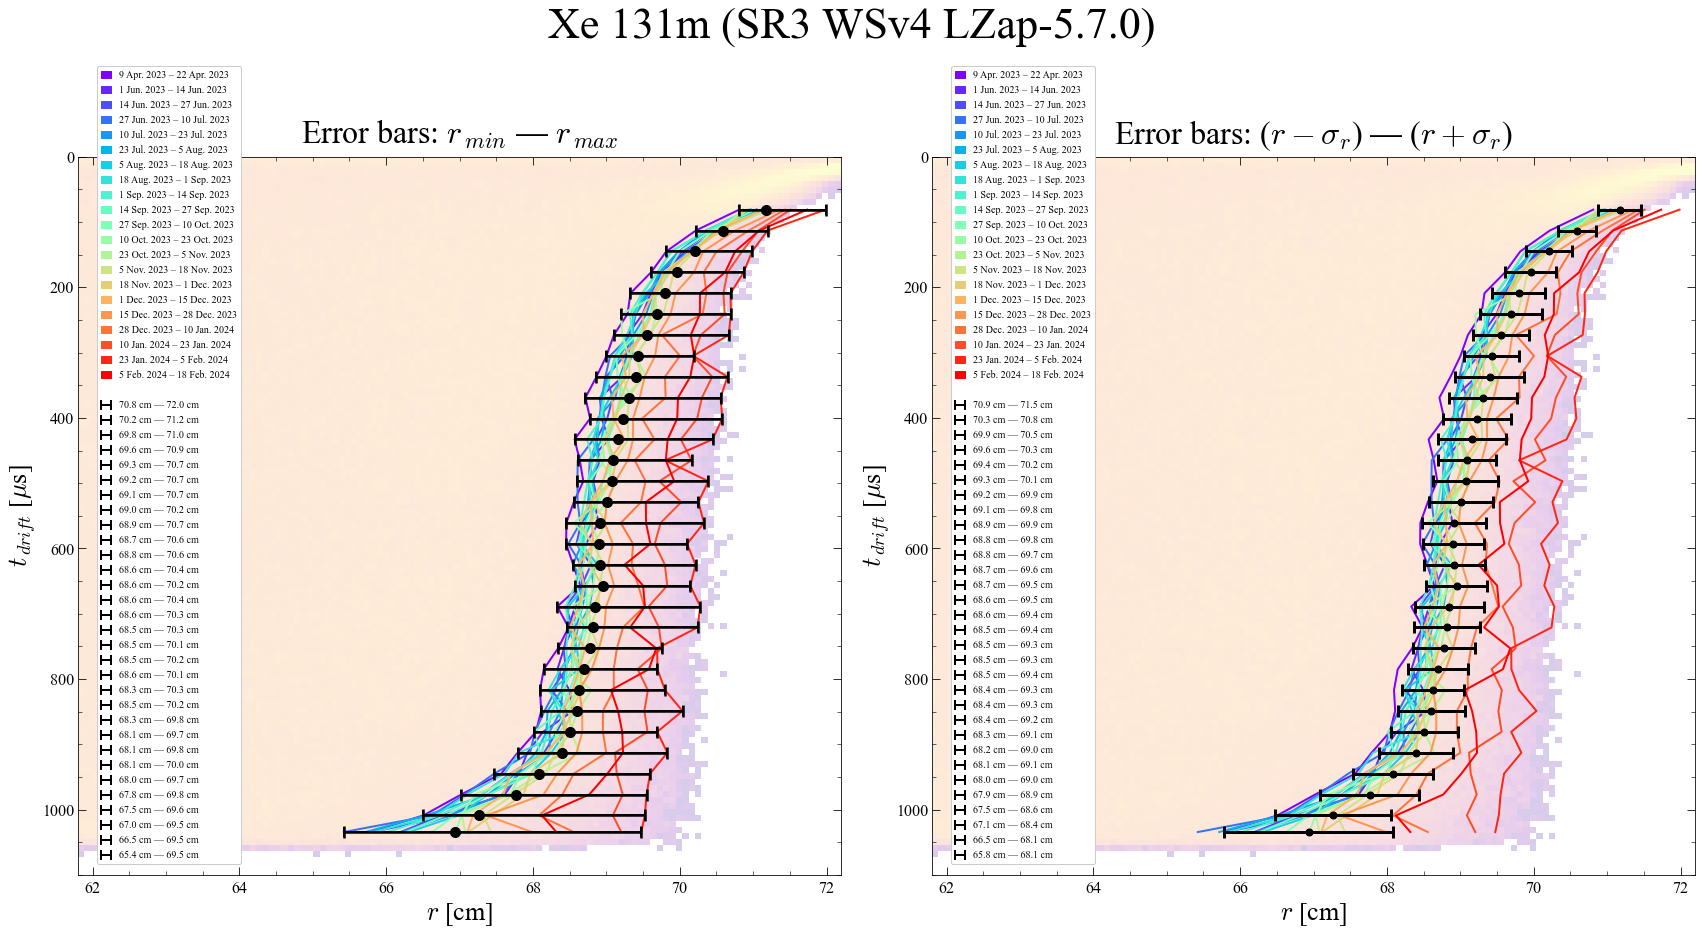

In [36]:

plot_dT_vs_r2_with_rerr(r2_hh, d_r2_hh, dT_mid, r2_good_mask, good_mask, \
                                                         t_cal_str, source_string = 'Xe 131m', \
                                                         r_events = r_events_2sig, dT_events = dT_events_2sig)

plt.savefig('dT-vs-r_points-error-and-histo_plot_all-dT-slices.png', dpi=300, bbox_inches='tight', pad_inches=0.2)


## Plot Wall Position as a Function of Time

In [37]:
# get shapes of r2_dim_dT_calT & dT_dim_dT_calT

# r2_dim_calT_dT  
# d_r2_dim_calT_dT 
# dT_dim_calT_dT

print(f"The _dim_dT_calT lists give have: ")
print()
print(f"      dim[0] - drift time")
print(f"      dim[1] - cal time")
print()
print(f"r2_dim_dT_calT.shape = {r2_dim_dT_calT.shape}")
print(f"dT_dim_dT_calT.shape = {dT_dim_dT_calT.shape}")

# print()
# print(f"r2_dim_dT_calT = {r2_dim_dT_calT}")


The _dim_dT_calT lists give have: 

      dim[0] - drift time
      dim[1] - cal time

r2_dim_dT_calT.shape = (31, 25)
dT_dim_dT_calT.shape = (31, 25)


In [38]:
# plot r vs. calT for each dT


def get_plot_r_vs_calT_for_all_dT_slices(r2_dim_dT_calT, dT_dim_dT_calT, t_cal_str, days_since_start_int, dT_i, dT_f, source_string = 'Xe 131m'):
    
    # get variables in order of dT then calT
    r_dim_dT_calT = np.sqrt(r2_dim_dT_calT)
    
    # Set up the figure and subplots
    fig, ax = plt.subplots(1, figsize=(18, 12))
    
    # create ticks for plotting calendar time on y-axis
    calT_ticks = np.arange(len(t_cal_str))
    calT       = days_since_start_int
    
    # create a color list so each dT slice gets its own colored line
    colorlist_backwards = plt.cm.rainbow(np.linspace(0, 1, len(dT_dim_dT_calT)))
    colorlist = colorlist_backwards[::-1]
    
    # create an empty list of handles for labeling plot with patches
    handles_dT = []
    
    # plot calT vs. r for each dT slice
    for i in range(len(dT_dim_dT_calT)): 
        
        # Mask NaN values
        nan_mask  = np.isfinite(r_dim_dT_calT[i])
        r_plot    = r_dim_dT_calT[i][nan_mask]
        calT_plot = calT_ticks[nan_mask]
        
        # plot lines
        ax.plot(calT_plot, r_plot, color=colorlist[i], linewidth=2.5, zorder=20)
        
        # plot points
        ax.scatter(calT_ticks, r_dim_dT_calT[i], color=colorlist[i], marker = "o", s=20, zorder=20)
        
        # get info for labeling
        # min r and max r
        r_min   = np.nanmin(r_plot)
        r_max   = np.nanmax(r_plot)
        delta_r = np.round(r_max - r_min, 2)
        
        # get drift time slice range for labeling
        dT_label = f"{int(dT_i[i])} $\mathrm{{\mu s}}$ - {int(dT_f[i])} $\mathrm{{\mu s}}$ [$\Delta r~=$ {delta_r} cm]"
        
        # create patches in colorlist for the legend
        handles_dT_i = mpatches.Patch(color=colorlist[i], label = dT_label)
        handles_dT.append(handles_dT_i)
    
    # Set labels, title, and plot range
    ax.set_xlim(-0.5,24.5)
    ax.set_ylim(63.7, 72.3)
    ax.set_ylabel('$r$ [cm]', fontsize = 28, labelpad=20)
    ax.set_xlabel('Days since 27 March 2023', fontsize = 28, labelpad=20)
    ax.set_xticks(calT_ticks)
    ax.set_xticklabels(calT, fontsize=18) # rotation=30
    ax.set_title(f"for each of the {len(r2_dim_dT_calT)} drift time slices", fontsize = 28, y=1.01)
    # Add main title above the subplots
    main_title    = f"{source_string} (SR3 WSv4 LZap-5.7.0) - Wall Position vs. Calendar Time"
    fig.suptitle(main_title, y=0.98, fontsize=34)
    ax.legend(handles = handles_dT, loc='lower right', fontsize = 15, bbox_to_anchor=(1.32, -0.12))
    
    # add gridlines
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))  # Major ticks every 1 unit
    ax.xaxis.set_minor_locator(plt.NullLocator())       # No minor ticks
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))  # Major ticks every 0.2 units
    ax.yaxis.set_minor_locator(AutoMinorLocator())       # Automatic minor ticks
    ax.yaxis.set_minor_formatter(plt.NullFormatter())        # No minor tick labels
    # Customize the appearance of gridlines
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha = 0.3)  # Major gridlines
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray', alpha = 0.3)   # Minor gridlines

    print()
    
    return 
    

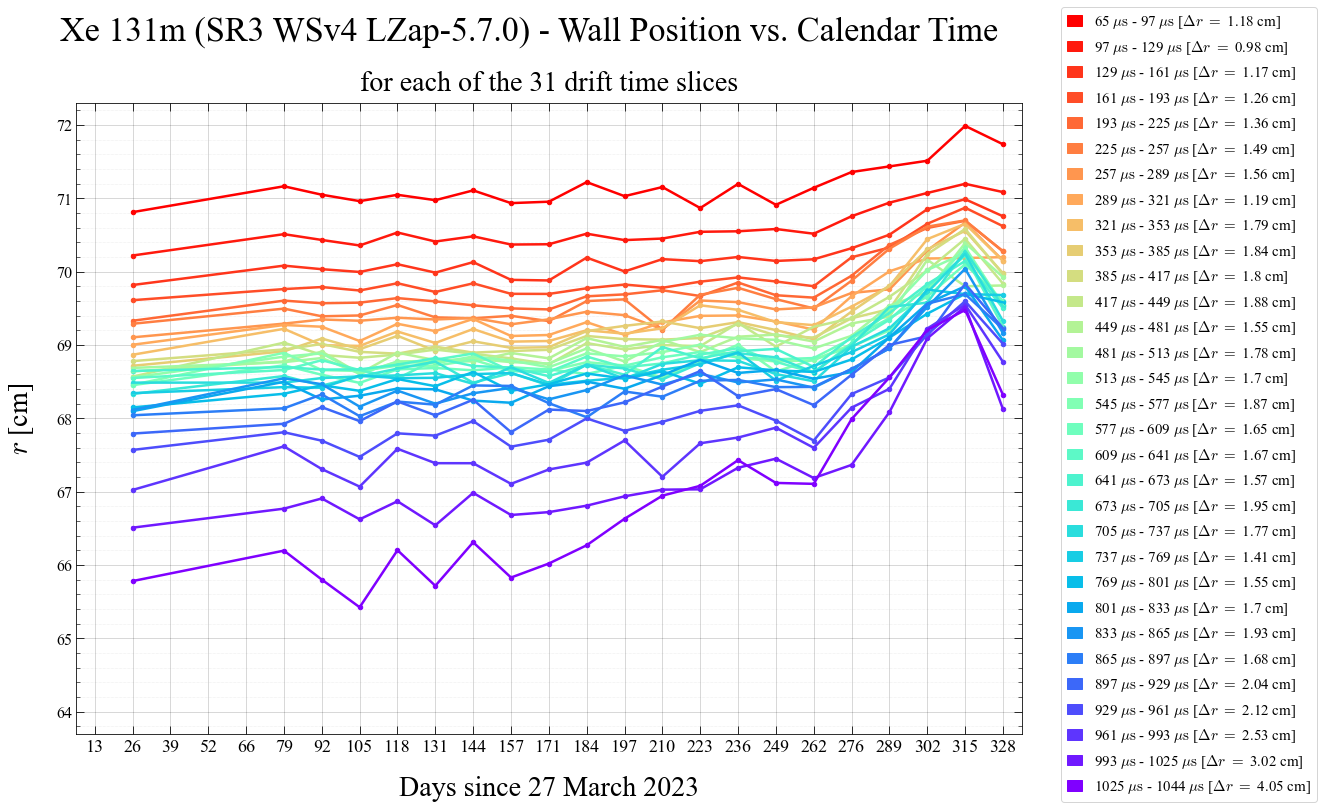

In [39]:

get_plot_r_vs_calT_for_all_dT_slices(r2_dim_dT_calT, dT_dim_dT_calT, \
                                     t_cal_str, days_since_start_int, dT_i, dT_f)

plt.savefig('r-vs-calT_plot_all-dT-slices.png', dpi=300, bbox_inches='tight')

In [40]:
# plot cal time vs. r for averaged dT regions


def get_plot_calT_vs_r_for_avg_dT_regions(r2_dim_dT_calT, dT_dim_dT_calT, n_slice_dim_dT_calT, t_cal_str, days_since_start_int, \
                                          dT_i, dT_f, num_edge_points=5, source_string = 'Xe 131m'):
    
    # get variables in order of dT then calT
    r_dim_dT_calT = np.sqrt(r2_dim_dT_calT)
    
    """
    get 3 dT regions, one for the top of the detector, one for the bottom, and one for the middle
    """
    npts = num_edge_points
    
    # for number of counts in each slice
    n_slice_dim_dT_calT_top_list = n_slice_dim_dT_calT[:npts, :]
    n_slice_dim_dT_calT_cen_list = n_slice_dim_dT_calT[npts:-npts, :]
    n_slice_dim_dT_calT_bot_list = n_slice_dim_dT_calT[-npts:, :]  
    
    # for dT_dim_dT_calT
    dT_dim_dT_calT_top_list = dT_dim_dT_calT[:npts, :]
    dT_dim_dT_calT_cen_list = dT_dim_dT_calT[npts:-npts, :]
    dT_dim_dT_calT_bot_list = dT_dim_dT_calT[-npts:, :]    

    # for r_dim_dT_calT
    r_dim_dT_calT_top_list = r_dim_dT_calT[:npts, :]
    r_dim_dT_calT_cen_list = r_dim_dT_calT[npts:-npts, :]
    r_dim_dT_calT_bot_list = r_dim_dT_calT[-npts:, :]

    # for dT_i
    dT_i_top_list = dT_i[:npts]
    dT_i_cen_list = dT_i[npts:-npts]
    dT_i_bot_list = dT_i[-npts:]

    # for dT_f
    dT_f_top_list = dT_f[:npts]
    dT_f_cen_list = dT_f[npts:-npts]
    dT_f_bot_list = dT_f[-npts:]
        
    # print(f"len(dT_dim_dT_calT_top_list) = {len(dT_dim_dT_calT_top_list)}")
    # print(f"len(dT_dim_dT_calT_cen_list) = {len(dT_dim_dT_calT_cen_list)}")
    # print(f"len(dT_dim_dT_calT_bot_list) = {len(dT_dim_dT_calT_bot_list)}")
    # print()
    # print(f"len(r_dim_dT_calT_top_list) = {len(r_dim_dT_calT_top_list)}")
    # print(f"len(r_dim_dT_calT_cen_list) = {len(r_dim_dT_calT_cen_list)}")
    # print(f"len(r_dim_dT_calT_bot_list) = {len(r_dim_dT_calT_bot_list)}")
    # print()
    # print(f"len(r_dim_dT_calT_top_list[0]) = {len(r_dim_dT_calT_top_list[0])}")
    # print(f"len(r_dim_dT_calT_cen_list[0]) = {len(r_dim_dT_calT_cen_list[0])}")
    # print(f"len(r_dim_dT_calT_bot_list[0]) = {len(r_dim_dT_calT_bot_list[0])}")
    # print()
    # print(f"len(dT_i_top_list) = {len(dT_i_top_list)}")
    # print(f"len(dT_i_bot_list) = {len(dT_i_bot_list)}")
    # print(f"len(dT_i_cen_list) = {len(dT_i_cen_list)}")
    
    """
    get the mean values of each region of the detector
    """
    
    # for dT_dim_dT_calT
    dT_dim_dT_calT_top = np.nanmean(dT_dim_dT_calT_top_list, axis=0)
    dT_dim_dT_calT_cen = np.nanmean(dT_dim_dT_calT_cen_list, axis=0)
    dT_dim_dT_calT_bot = np.nanmean(dT_dim_dT_calT_bot_list, axis=0)   
    
    # for r_dim_dT_calT
    # get masked arrays for r
    r_dim_dT_calT_top_list_nonan = np.ma.masked_array(r_dim_dT_calT_top_list, np.isnan(r_dim_dT_calT_top_list))
    r_dim_dT_calT_cen_list_nonan = np.ma.masked_array(r_dim_dT_calT_cen_list, np.isnan(r_dim_dT_calT_cen_list))
    r_dim_dT_calT_bot_list_nonan = np.ma.masked_array(r_dim_dT_calT_bot_list, np.isnan(r_dim_dT_calT_bot_list))
    # get masked arrays for weights (based on number of counts in slice)
    w_top = np.ma.masked_array(n_slice_dim_dT_calT_top_list, np.isnan(n_slice_dim_dT_calT_top_list))
    w_cen = np.ma.masked_array(n_slice_dim_dT_calT_cen_list, np.isnan(n_slice_dim_dT_calT_cen_list))
    w_bot = np.ma.masked_array(n_slice_dim_dT_calT_bot_list, np.isnan(n_slice_dim_dT_calT_bot_list))
    # calculate weighted average 
    r_dim_dT_calT_top = np.average(r_dim_dT_calT_top_list_nonan, axis=0, weights=w_top)
    r_dim_dT_calT_cen = np.average(r_dim_dT_calT_cen_list_nonan, axis=0, weights=w_cen)
    r_dim_dT_calT_bot = np.average(r_dim_dT_calT_bot_list_nonan, axis=0, weights=w_bot)
    # fill empties with nans again
    r_dim_dT_calT_top = r_dim_dT_calT_top.filled(np.nan)
    r_dim_dT_calT_cen = r_dim_dT_calT_cen.filled(np.nan)
    r_dim_dT_calT_bot = r_dim_dT_calT_bot.filled(np.nan)
    # get error on r (formatting to include other errors later on as well)
    r_dim_dT_calT_top_std = np.nanstd(r_dim_dT_calT_top_list, axis=0)
    r_dim_dT_calT_cen_std = np.nanstd(r_dim_dT_calT_cen_list, axis=0)
    r_dim_dT_calT_bot_std = np.nanstd(r_dim_dT_calT_bot_list, axis=0)
    r_dim_dT_calT_top_err = np.sqrt((r_dim_dT_calT_top_std)**2)
    r_dim_dT_calT_cen_err = np.sqrt((r_dim_dT_calT_cen_std)**2)
    r_dim_dT_calT_bot_err = np.sqrt((r_dim_dT_calT_bot_std)**2)
    
    # print(f"r_dim_dT_calT_top ={r_dim_dT_calT_top}")

    # for dT_i
    dT_i_top = dT_i_top_list[0]
    dT_i_cen = dT_i_cen_list[0]
    dT_i_bot = dT_i_bot_list[0]

    # for dT_f
    dT_f_top = dT_f_top_list[-1]
    dT_f_cen = dT_f_cen_list[-1]
    dT_f_bot = dT_f_bot_list[-1]
    
    # arrange each of these values into lists
    dT_dim_dT_calT_regions    = [dT_dim_dT_calT_top, dT_dim_dT_calT_cen, dT_dim_dT_calT_bot]
    r_dim_dT_calT_regions     = [r_dim_dT_calT_top, r_dim_dT_calT_cen, r_dim_dT_calT_bot]
    r_dim_dT_calT_err_regions = [r_dim_dT_calT_top_err, r_dim_dT_calT_cen_err, r_dim_dT_calT_bot_err]
    dT_i_regions              = [dT_i_top, dT_i_cen, dT_i_bot]
    dT_f_regions              = [dT_f_top, dT_f_cen, dT_f_bot]
    
    # Set up the figure and subplots
    fig, ax = plt.subplots(1, figsize=(21, 12))
    
    # create ticks for plotting calendar time on y-axis
    calT_ticks = np.arange(len(t_cal_str))
    calT       = days_since_start_int
    
    # create a color list so each dT slice gets its own colored line
    colorlist = ['xkcd:bright red', 'xkcd:medium green', 'xkcd:lightish blue'] # 'xkcd:tangerine', 'xkcd:bright lavender'
    
    # create an empty list of handles for labeling plot with patches
    handles_dT = []
    detector_region = ['Top', 'Center', 'Bottom']
    
    # plot calT vs. r for each dT slice
    for i in range(len(dT_dim_dT_calT_regions)): 
        
        # create mask to plot gaps in data
        nan_mask  = np.isfinite(r_dim_dT_calT_regions[i])
        r_plot    = r_dim_dT_calT_regions[i][nan_mask]
        calT_plot = calT_ticks[nan_mask]
        
        # # plot error bars
        # ax.errorbar(r_dim_dT_calT_regions[i], calT_ticks, xerr=r_dim_dT_calT_err_regions[i], \
        #             color=colorlist[i], linewidth=2.5, capsize=6, capthick=2)
        # plot points
        ax.scatter(calT_plot, r_plot, color=colorlist[i], marker = "o", s=130, zorder=20)
        # plot lines
        ax.plot(calT_plot, r_plot, color=colorlist[i], linewidth=6)
        
        # get info for labeling
        # min r and max r
        r_min   = np.nanmin(r_plot)
        r_max   = np.nanmax(r_plot)
        delta_r = np.round(r_max - r_min, 2)
        sigma_r_avg = np.round(np.mean(r_plot), 2)
        
        # get drift time slice range for labeling
        dT_label = f"{detector_region[i]} Region: {dT_i_regions[i]} $\mathrm{{\mu s}}$ - {dT_f_regions[i]} $\mathrm{{\mu s}}$ [$\Delta r~=$ {delta_r} cm]"
        
        # create patches in colorlist for the legend
        handles_dT_i = mpatches.Patch(color=colorlist[i], label = dT_label)
        handles_dT.append(handles_dT_i)
    
    # Set labels, title, and plot range
    # Add main title above the subplots
    main_title    = f"{source_string} (SR3 WSv4 LZap-5.7.0) - Calendar Time vs. Wall Position"
    fig.suptitle(main_title, y=1, fontsize=34)
    ax.set_title(f"Top, Center, and Bottom Detector Regions", fontsize = 30, y=1.02)
    ax.set_ylim(66.2, 71.4)
    ax.set_xlim(-0.5, 24.5)
    ax.set_ylabel('$r$ [cm]', fontsize = 28, labelpad=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel('Days since 27 March 2023', fontsize = 28, labelpad=20)
    ax.set_xticks(calT_ticks)
    ax.set_xticklabels(calT, fontsize=20)
    legend = ax.legend(handles = handles_dT, loc='upper left', fontsize = 22)
    # legend = ax.legend(handles = handles_dT, loc='lower left', fontsize = 20, bbox_to_anchor=(0, 0.75))
    # Set the facecolor of the legend to white
    legend.legendPatch.set_facecolor('white')
    legend.get_frame().set_alpha(1)
    
    # # add text to explain error bars 
    # plt.text(0.01, 0.95, 'Error bars taken as the stddev of all $r$-values in each detector region', \
    #         transform=plt.gca().transAxes, fontsize=18, verticalalignment='bottom', horizontalalignment='left', \
    #         bbox=dict(facecolor='white', alpha=1, edgecolor='none'))
    
    # add gridlines
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))  # Major ticks every 1 unit
    ax.xaxis.set_minor_locator(plt.NullLocator())       # No minor ticks
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))  # Major ticks every 0.2 units
    ax.yaxis.set_minor_locator(AutoMinorLocator())       # Automatic minor ticks
    ax.yaxis.set_minor_formatter(plt.NullFormatter())        # No minor tick labels
    # Customize the appearance of gridlines
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha = 0.3)  # Major gridlines
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray', alpha = 0.3)   # Minor gridlines
    
    print()
    print()
    
    return 
    

/global/homes/k/kwild/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


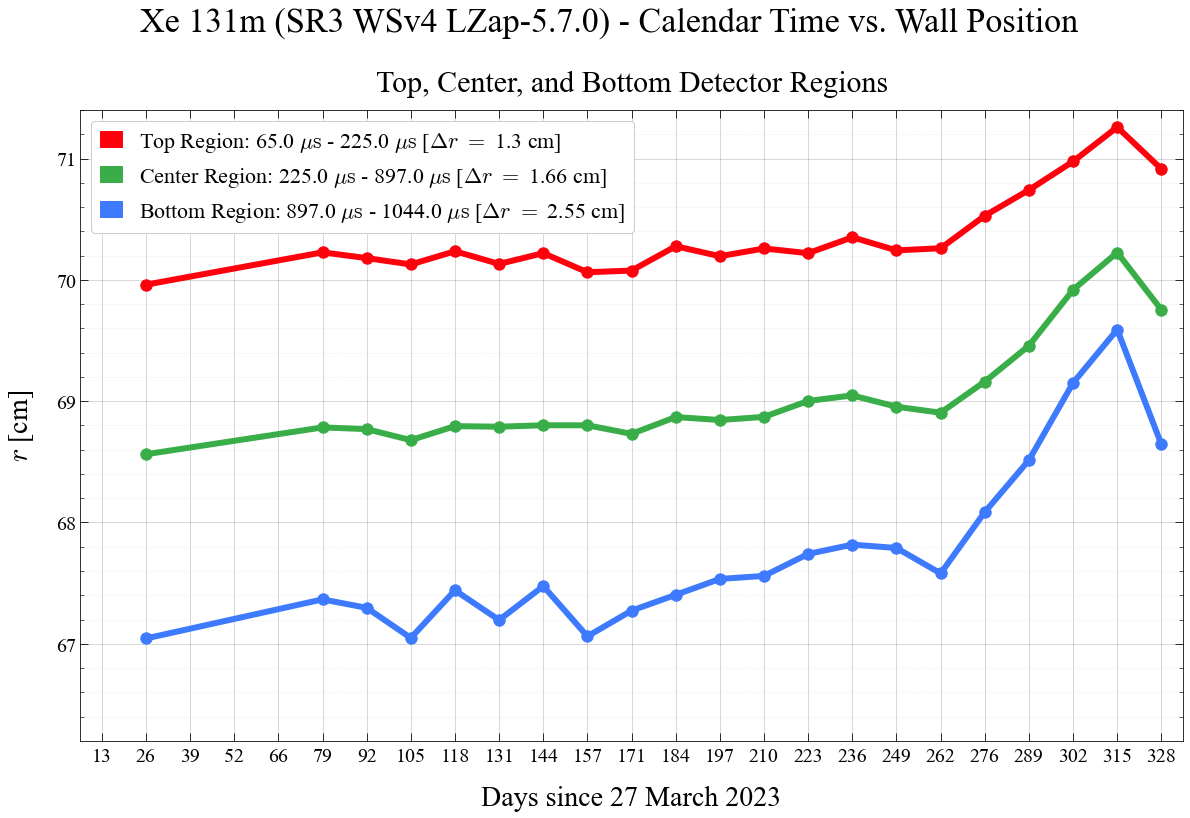

In [41]:
get_plot_calT_vs_r_for_avg_dT_regions(r2_dim_dT_calT, dT_dim_dT_calT, n_slice_dim_dT_calT, \
                                      t_cal_str, days_since_start_int, dT_i, dT_f)

plt.savefig('r-vs-calT_plot_3-dT-regions.png', dpi=300, bbox_inches='tight')

In [42]:
# # scrap

# # for dT_dim_dT_calT
#     dT_dim_dT_calT_top_list = []
#     dT_dim_dT_calT_bot_list = []
#     dT_dim_dT_calT_cen_list = []

#     # for r_dim_dT_calT
#     r_dim_dT_calT_top_list = []
#     r_dim_dT_calT_bot_list = []
#     r_dim_dT_calT_cen_list = []

#     # for dT_i
#     dT_i_top_list = []
#     dT_i_bot_list = []
#     dT_i_cen_list = []

#     # for dT_f
#     dT_f_top_list = []
#     dT_f_bot_list = []
#     dT_f_cen_list = []
    
#     # get 3 dT regions, one for the top of the detector, one for the bottom, and one for the middle
#     for i in range(len(dT_dim_dT_calT)):
        
#         """
#         get the first and last num_edge_points for 
#         the top and bottom of the detector, and the rest in the middle
#         """
#         # for dT_dim_dT_calT
#         dT_dim_dT_calT_top_list_loop = dT_dim_dT_calT[i][:num_edge_points]
#         dT_dim_dT_calT_bot_list_loop = dT_dim_dT_calT[i][-num_edge_points:]
#         dT_dim_dT_calT_cen_list_loop = dT_dim_dT_calT[i][num_edge_points:-num_edge_points]
#         # append to lists outside of loop
#         dT_dim_dT_calT_top_list.append(dT_dim_dT_calT_top_list_loop)
#         dT_dim_dT_calT_bot_list.append(dT_dim_dT_calT_bot_list_loop)
#         dT_dim_dT_calT_cen_list.append(dT_dim_dT_calT_cen_list_loop)
        
#         # for r_dim_dT_calT
#         r_dim_dT_calT_top_list_loop = r_dim_dT_calT[i][:num_edge_points]
#         r_dim_dT_calT_bot_list_loop = r_dim_dT_calT[i][-num_edge_points:]
#         r_dim_dT_calT_cen_list_loop = r_dim_dT_calT[i][num_edge_points:-num_edge_points]
#         # append to lists outside of loop
#         r_dim_dT_calT_top_list.append(r_dim_dT_calT_top_list_loop)
#         r_dim_dT_calT_bot_list.append(r_dim_dT_calT_bot_list_loop)
#         r_dim_dT_calT_cen_list.append(r_dim_dT_calT_cen_list_loop)
        
#         # for dT_i
#         dT_i_top_list_loop = dT_i[:num_edge_points]
#         dT_i_bot_list_loop = dT_i[-num_edge_points:]
#         dT_i_cen_list_loop = dT_i[num_edge_points:-num_edge_points]
#         # append to lists outside of loop
#         dT_i_top_list.append(dT_i_top_list_loop)
#         dT_i_bot_list.append(dT_i_bot_list_loop)
#         dT_i_cen_list.append(dT_i_cen_list_loop)
        
#         # for dT_f
#         dT_f_top_list_loop = dT_f[:num_edge_points]
#         dT_f_bot_list_loop = dT_f[-num_edge_points:]
#         dT_f_cen_list_loop = dT_f[num_edge_points:-num_edge_points]
#         # append to lists outside of loop
#         dT_f_top_list.append(dT_f_top_list_loop)
#         dT_f_bot_list.append(dT_f_bot_list_loop)
#         dT_f_cen_list.append(dT_f_cen_list_loop)

In [43]:
# plot each dT's points as lines 
# same, but only for 3 top, middle, bottom
# pizza slices for azimuthal?
# dielectric teflon discharge into xenon?
# lux wall model, charge decreasing, use as example to think about